# Intelligent Systems
## HW4
### Reza Jahani / 810198377

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Question 1) Analytical Implementation of Neural Network

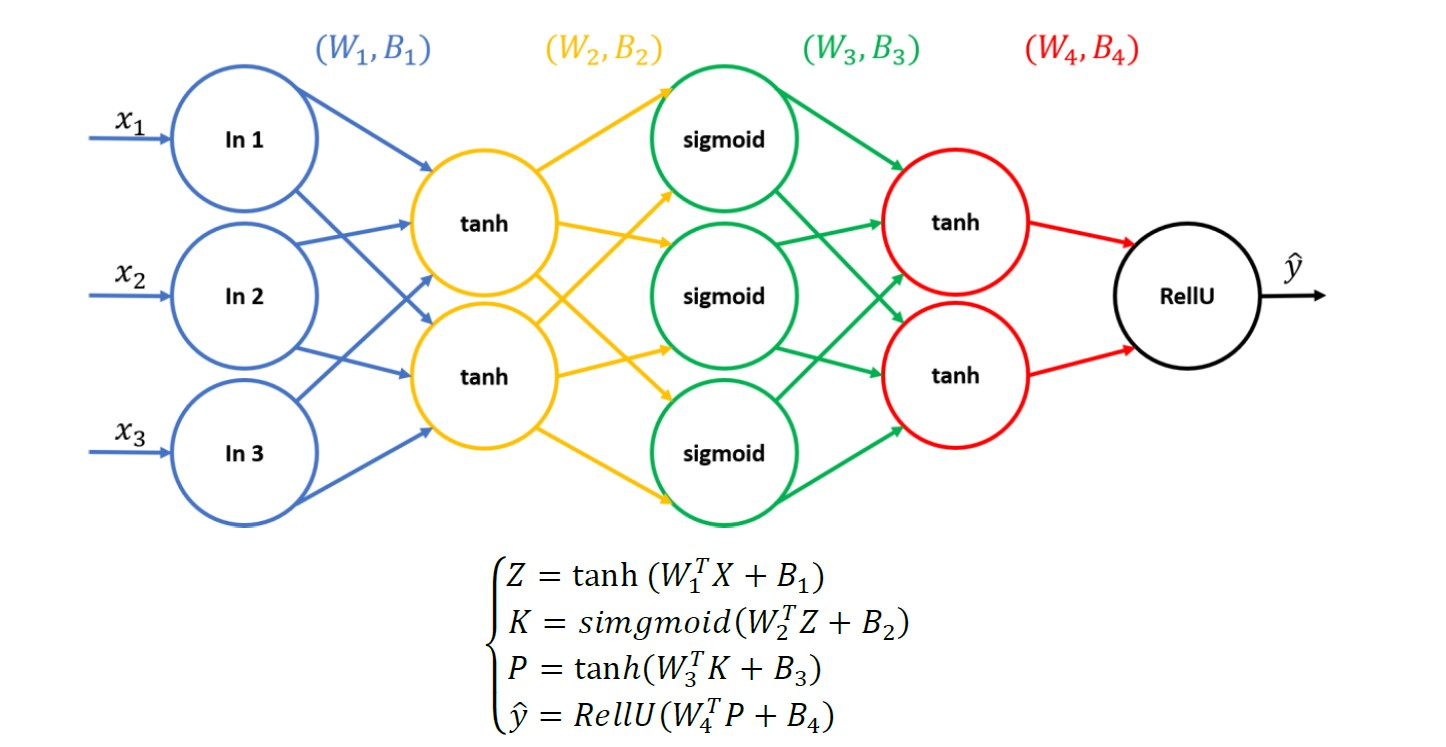

> Indented block



In [ ]:
X1 = np.array([7,7,7])
X2 = np.array([7,7,7])
Y1 = 7
Y2 = 7
W1 = np.array([[0.17,0.37,0.57],
               [0.27,0.47,0.47]])
W2 = np.array([[7.15,7.45],
               [7.25,7.55],
               [7.35,7.65]])
W3 = np.array([[49.12,49.32,49.52],
               [49.22,49.42,49.62]])
W4 = np.array([[0.16,0.36]])
B1 = np.array([0.71,0.72])
B2 = np.array([7.15,7.25,7.35])
B3 = np.array([0.995,1.095])
B4 = 0.26

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [ ]:
def Relu(x):
    if x>=0:
        return x
    else:
        return 0

In [ ]:
def u(x):
    if x>=0:
        return 1
    else:
        return 0

Forward Propagation #1

In [ ]:
A1 = np.dot(W1,X1) + B1
Z = np.tanh(A1)
A2 = np.dot(W2,Z) + B2
K = sigmoid(A2)
A3 = np.dot(W3,K) + B3
P = np.tanh(A3)
A4 = np.dot(W4,P) + B4
y_hat = Relu(A4)

Backward Propagation #1

In [ ]:
D_W4 = (y_hat - Y1) * u(A4) * P
D_B4 = (y_hat - Y1) * u(A4)
D_W3 = np.reshape((np.dot(W4.T,D_B4)*(1-P**2)),(2,1))*(np.reshape(K,(3,1)).T)
D_B3 = (np.dot(W4.T,D_B4)*(1-P**2))
D_W2 = np.reshape((np.dot(W3.T,D_B3)*(K*(1-K))),(3,1))*(np.reshape(Z,(2,1)).T)
D_B2 = np.dot(W3.T,D_B3)*(K*(1-K))
D_W1 = np.reshape(np.dot(W2.T,D_B2)*(1-Z**2),(2,1))*(np.reshape(X1,(3,1)).T)
D_B1 = np.dot(W2.T,D_B2)*(1-Z**2)

In [ ]:
alpha = 0.35     #Learning Rate
W4 = W4 - alpha*D_W4
W3 = W3 - alpha*D_W3
W2 = W2 - alpha*D_W2
W1 = W1 - alpha*D_W1
B4 = B4 - alpha*D_B4
B3 = B3 - alpha*D_B3
B2 = B2 - alpha*D_B2
B1 = B1 - alpha*D_B1

Forward Propagation #2

In [ ]:
A1 = np.dot(W1,X2) + B1
Z = np.tanh(A1)
A2 = np.dot(W2,Z) + B2
K = sigmoid(A2)
A3 = np.dot(W3,K) + B3
P = np.tanh(A3)
A4 = np.dot(W4,P) + B4
y_hat = Relu(A4)

Backward Propagation #2

In [ ]:
D_W4 = (y_hat - Y2) * u(A4) * P
D_B4 = (y_hat - Y2) * u(A4)
D_W3 = np.reshape((np.dot(W4.T,D_B4)*(1-P**2)),(2,1))*(np.reshape(K,(3,1)).T)
D_B3 = (np.dot(W4.T,D_B4)*(1-P**2))
D_W2 = np.reshape((np.dot(W3.T,D_B3)*(K*(1-K))),(3,1))*(np.reshape(Z,(2,1)).T)
D_B2 = np.dot(W3.T,D_B3)*(K*(1-K))
D_W1 = np.reshape(np.dot(W2.T,D_B2)*(1-Z**2),(2,1))*(np.reshape(X1,(3,1)).T)
D_B1 = np.dot(W2.T,D_B2)*(1-Z**2)

W4 = W4 - alpha*D_W4
W3 = W3 - alpha*D_W3
W2 = W2 - alpha*D_W2
W1 = W1 - alpha*D_W1
B4 = B4 - alpha*D_B4
B3 = B3 - alpha*D_B3
B2 = B2 - alpha*D_B2
B1 = B1 - alpha*D_B1

In [ ]:
L = 1/2 * (y_hat - Y2)**2
print(f"Loss Function After 2 Iteration:{np.round(L[0],2)}")
print("Weights after Training")
print(f"W1:{W1}")
print(f"W2:{W2}")
print(f"W3:{W3}")
print(f"W4:{W4}")
print(f"B1:{B1}")
print(f"B2:{B2}")
print(f"B3:{B3}")
print(f"B4:{B4}")

Loss Function After 2 Iteration:0.05
Weights after Training
W1:[[0.17 0.37 0.57]
 [0.27 0.47 0.47]]
W2:[[7.15 7.45]
 [7.25 7.55]
 [7.35 7.65]]
W3:[[49.12 49.32 49.52]
 [49.22 49.42 49.62]]
W4:[[2.22815 2.42815]]
B1:[0.71 0.72]
B2:[7.15 7.25 7.35]
B3:[0.995 1.095]
B4:[2.32815]


# Question 2) Neural Network Application in Classification

### Libraries and Initial Steps
Importing libraries & Downlaoading the dataset

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, Adagrad
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.datasets import cifar10
import tensorflow as tf
import multiprocessing as mp
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score , recall_score, f1_score
from keras.callbacks import EarlyStopping

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
Label_Names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

 First 10 images plot

=========== Image 1 ===========
frog


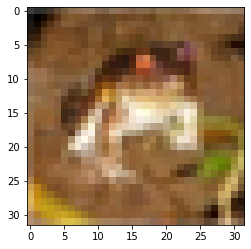

=========== Image 2 ===========
truck


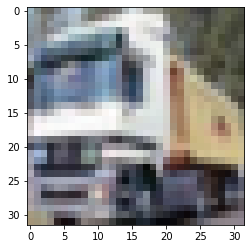

=========== Image 3 ===========
truck


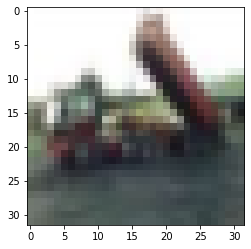

=========== Image 4 ===========
deer


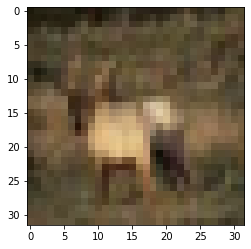

=========== Image 5 ===========
automobile


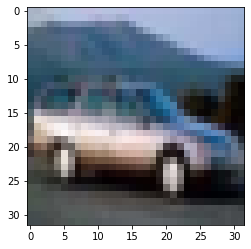

=========== Image 6 ===========
automobile


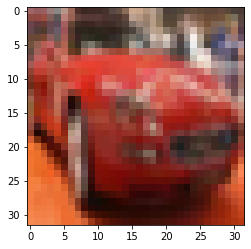

=========== Image 7 ===========
bird


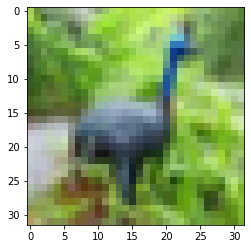

=========== Image 8 ===========
horse


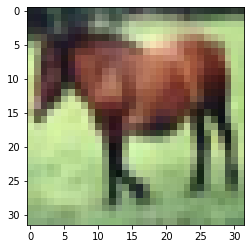

=========== Image 9 ===========
ship


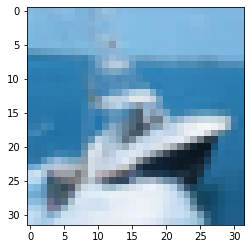

=========== Image 10 ===========
cat


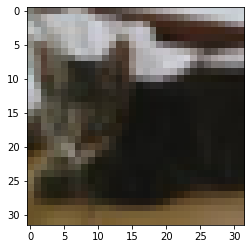

In [ ]:
for i in range(10):
    print(f"=========== Image {i+1} ===========")
    pic = x_train[i]
    pic_class = Label_Names[y_train[i][0]]
    print(pic_class)
    plt.imshow(pic)
    plt.show()

### Preprocessing Data

In this part the data is flattened and the labels are one-hot encoded. After that a normalization is carried out. Then the data is splitted to 3 partitions of Train, Validation, and Test.

In [ ]:
y_tr = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_tr = np.reshape(x_train.astype('float32'),(x_train.shape[0],x_train.shape[1]*x_train.shape[2]*x_train.shape[3]))
x_test = np.reshape(x_test.astype('float32'),(x_test.shape[0],x_test.shape[1]*x_test.shape[2]*x_test.shape[3]))
x_tr = x_tr / 255
x_test = x_test / 255

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_tr,y_tr,test_size = 0.25,train_size =0.75)

## Section 1) MLP Network

### Initial Parameters and Network Architecture

In [ ]:
num_neurons = [1500,750]
alpha = 1e-3
num_out_neuron = len(Label_Names)
num_features = x_train.shape[1]

In [ ]:
def MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func):
    model = Sequential()
    model.add(Dense(num_neurons[0],input_shape=(num_features,),activation=activation_functions[0]))     # Hidden Layer 1
    model.add(Dense(num_neurons[1],activation=activation_functions[1]))                                 # Hidden Layer 2
    model.add(Dense(num_out_neuron,activation=activation_functions[2]))                                 # Output Layer
    model.compile(optimizer=model_optimizer,loss=loss_func,metrics=['accuracy'])
    return model

def history_plot(history):
    plt.figure(figsize=(20, 7), dpi=80, facecolor='w', edgecolor='w')
    font = {'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    plt.subplot(121)
    plt.plot(history.history['loss'],label="training data")
    plt.plot(history.history['val_loss'],label="validation data")
    plt.grid('on')
    plt.xlabel("epoch")
    plt.legend()
    plt.title("MLP Network Loss")

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label="training data")
    plt.plot(history.history['val_accuracy'], label="validation data")
    plt.grid('on')
    plt.xlabel("epoch")
    plt.legend()
    plt.title('MLP Network Accuracy')

def Model_Evaluation(model,x_test,y_test):
    y_pred = model.predict(x_test)
    Y = np.argmax(y_test,axis=1)
    Y_hat = np.argmax(y_pred,axis=1)
    loss,accuracy = model.evaluate(x_test,y_test)
    Confusion_Matrix = confusion_matrix(Y,Y_hat)
    plt.figure(figsize=(20,20))
    sns.heatmap(Confusion_Matrix,annot=True)
    print(f"Model Accuracy={np.round(accuracy,3)*100}%")
    print(f"Model Loss={np.round(loss,2)}")
    return 0

def Evaluation(model,x_test,y_test):
    y_pred = model.predict(x_test)
    Y = np.argmax(y_test,axis=1)
    Y_hat = np.argmax(y_pred,axis=1)
    recall = recall_score(Y,Y_hat,average='macro')
    precision = precision_score(Y,Y_hat,average='macro')
    f1 = f1_score(Y,Y_hat,average='macro')
    return recall, precision, f1

### Part 1 - Batch Size Effect on Accuracy & Loss

In [ ]:
activation_functions = ['relu','relu','softmax']
model_optimizer = SGD(learning_rate=alpha)
loss_func = 'categorical_crossentropy'

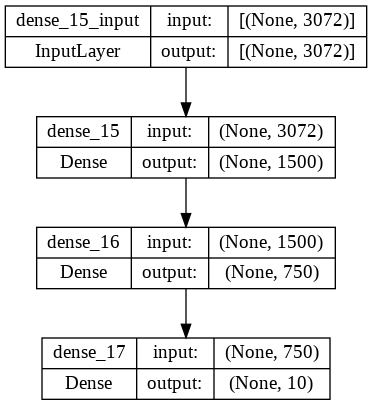

In [ ]:
model_1 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
plot_model(model_1,show_shapes=True,show_layer_names=True)

Batch Size = 64

In [ ]:
history_1 = model_1.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=64,epochs=60)

Epoch 1/60
586/586 [==============================] - 3s 5ms/step - loss: 2.1350 - accuracy: 0.2421 - val_loss: 2.0236 - val_accuracy: 0.3000
Epoch 2/60
586/586 [==============================] - 3s 5ms/step - loss: 1.9726 - accuracy: 0.3187 - val_loss: 1.9315 - val_accuracy: 0.3341
Epoch 3/60
586/586 [==============================] - 3s 5ms/step - loss: 1.9030 - accuracy: 0.3456 - val_loss: 1.8789 - val_accuracy: 0.3542
Epoch 4/60
586/586 [==============================] - 3s 5ms/step - loss: 1.8598 - accuracy: 0.3579 - val_loss: 1.8467 - val_accuracy: 0.3607
Epoch 5/60
586/586 [==============================] - 3s 5ms/step - loss: 1.8291 - accuracy: 0.3684 - val_loss: 1.8229 - val_accuracy: 0.3674
Epoch 6/60
586/586 [==============================] - 3s 5ms/step - loss: 1.8046 - accuracy: 0.3771 - val_loss: 1.8004 - val_accuracy: 0.3790
Epoch 7/60
586/586 [==============================] - 3s 5ms/step - loss: 1.7845 - accuracy: 0.3839 - val_loss: 1.7795 - val_accuracy: 0.3870
Epoch 

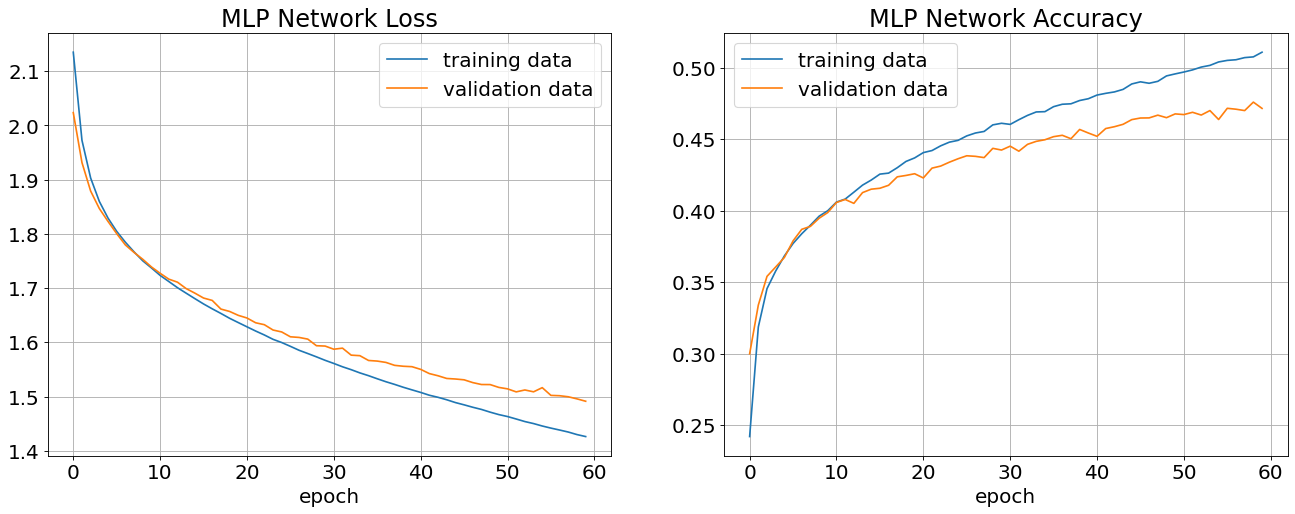

In [ ]:
history_plot(history_1)

Batch Size = 32

In [ ]:
model_2 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_2 = model_2.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 6s 5ms/step - loss: 2.0686 - accuracy: 0.2678 - val_loss: 1.9427 - val_accuracy: 0.3195
Epoch 2/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.8927 - accuracy: 0.3428 - val_loss: 1.8660 - val_accuracy: 0.3501
Epoch 3/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.8285 - accuracy: 0.3663 - val_loss: 1.8143 - val_accuracy: 0.3670
Epoch 4/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.7871 - accuracy: 0.3805 - val_loss: 1.7748 - val_accuracy: 0.3822
Epoch 5/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.7570 - accuracy: 0.3927 - val_loss: 1.7545 - val_accuracy: 0.3942
Epoch 6/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.7313 - accuracy: 0.4011 - val_loss: 1.7253 - val_accuracy: 0.4070
Epoch 7/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.7090 - accuracy: 0.4082 - val_loss: 1.7157 - val_accuracy:

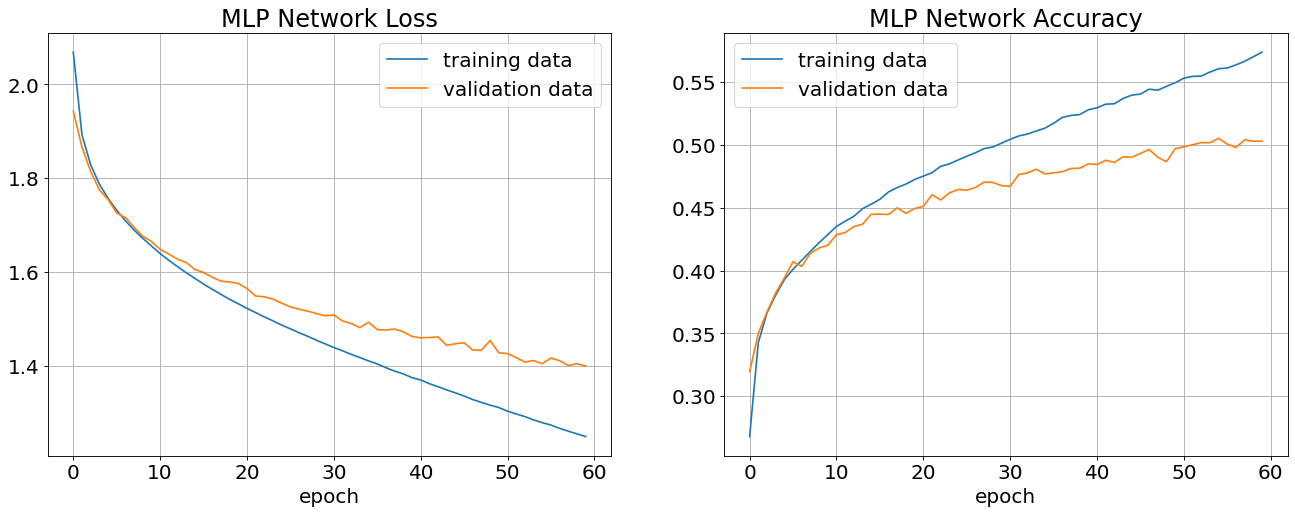

In [ ]:
history_plot(history_2)

Batch Size = 256

In [ ]:
model_3 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_3 = model_3.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=256,epochs=100)

Epoch 1/100
147/147 [==============================] - 3s 16ms/step - loss: 2.2500 - accuracy: 0.1634 - val_loss: 2.1822 - val_accuracy: 0.2192
Epoch 2/100
147/147 [==============================] - 1s 7ms/step - loss: 2.1424 - accuracy: 0.2440 - val_loss: 2.1064 - val_accuracy: 0.2606
Epoch 3/100
147/147 [==============================] - 1s 7ms/step - loss: 2.0785 - accuracy: 0.2762 - val_loss: 2.0542 - val_accuracy: 0.2814
Epoch 4/100
147/147 [==============================] - 1s 6ms/step - loss: 2.0336 - accuracy: 0.2967 - val_loss: 2.0160 - val_accuracy: 0.2960
Epoch 5/100
147/147 [==============================] - 1s 8ms/step - loss: 1.9993 - accuracy: 0.3122 - val_loss: 1.9868 - val_accuracy: 0.3067
Epoch 6/100
147/147 [==============================] - 1s 6ms/step - loss: 1.9718 - accuracy: 0.3226 - val_loss: 1.9635 - val_accuracy: 0.3100
Epoch 7/100
147/147 [==============================] - 1s 7ms/step - loss: 1.9489 - accuracy: 0.3312 - val_loss: 1.9413 - val_accuracy: 0.323

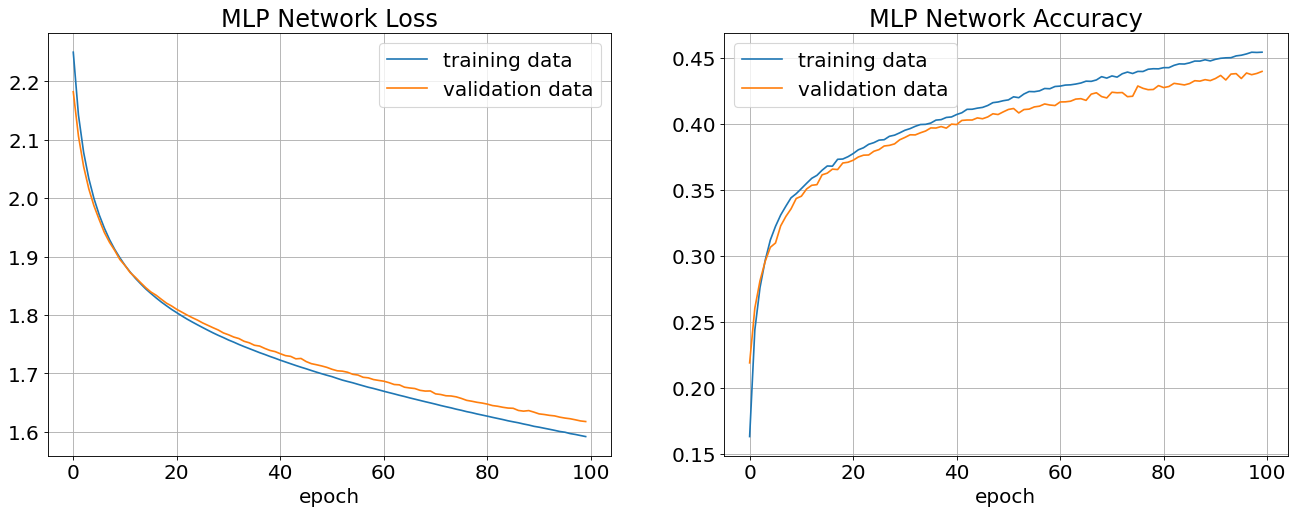

In [ ]:
history_plot(history_3)

### Part 2 - Activation Functions Effect

In [ ]:
activation_functions = ['relu','relu','sigmoid']
model_1 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_1 = model_1.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 12s 7ms/step - loss: 2.0513 - accuracy: 0.2758 - val_loss: 1.9475 - val_accuracy: 0.3135
Epoch 2/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8811 - accuracy: 0.3471 - val_loss: 1.8573 - val_accuracy: 0.3598
Epoch 3/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.8173 - accuracy: 0.3712 - val_loss: 1.8166 - val_accuracy: 0.3682
Epoch 4/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7765 - accuracy: 0.3863 - val_loss: 1.7863 - val_accuracy: 0.3842
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7452 - accuracy: 0.3980 - val_loss: 1.7498 - val_accuracy: 0.3950
Epoch 6/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7190 - accuracy: 0.4046 - val_loss: 1.7286 - val_accuracy: 0.4038
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.6965 - accuracy: 0.4143 - val_loss: 1.7117 - val_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 1.3849 - accuracy: 0.5125
Model Accuracy=51.2%
Model Loss=1.38


0

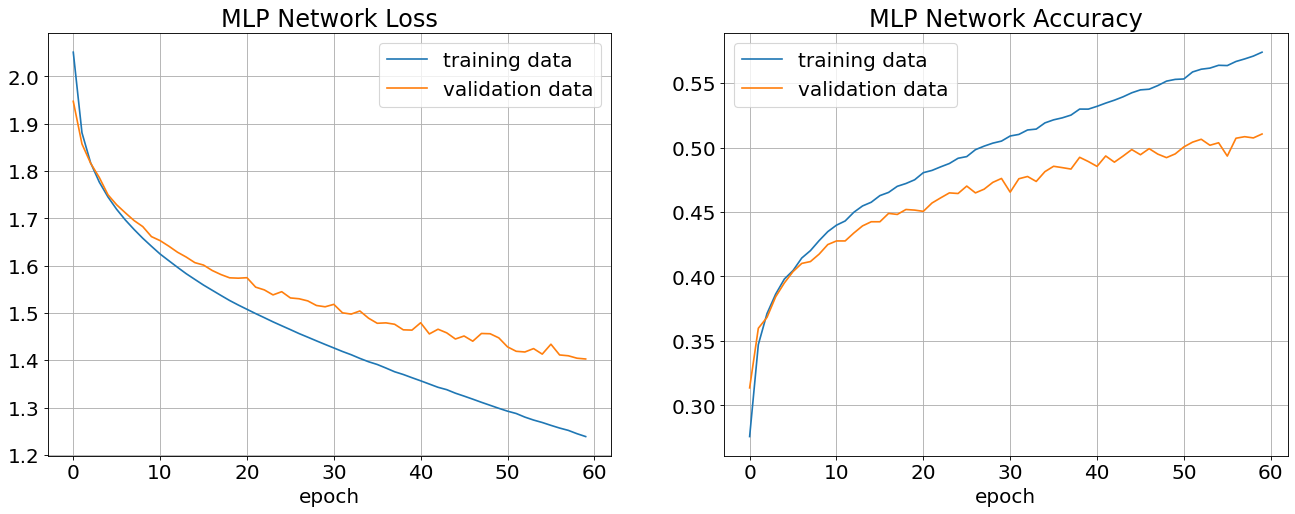

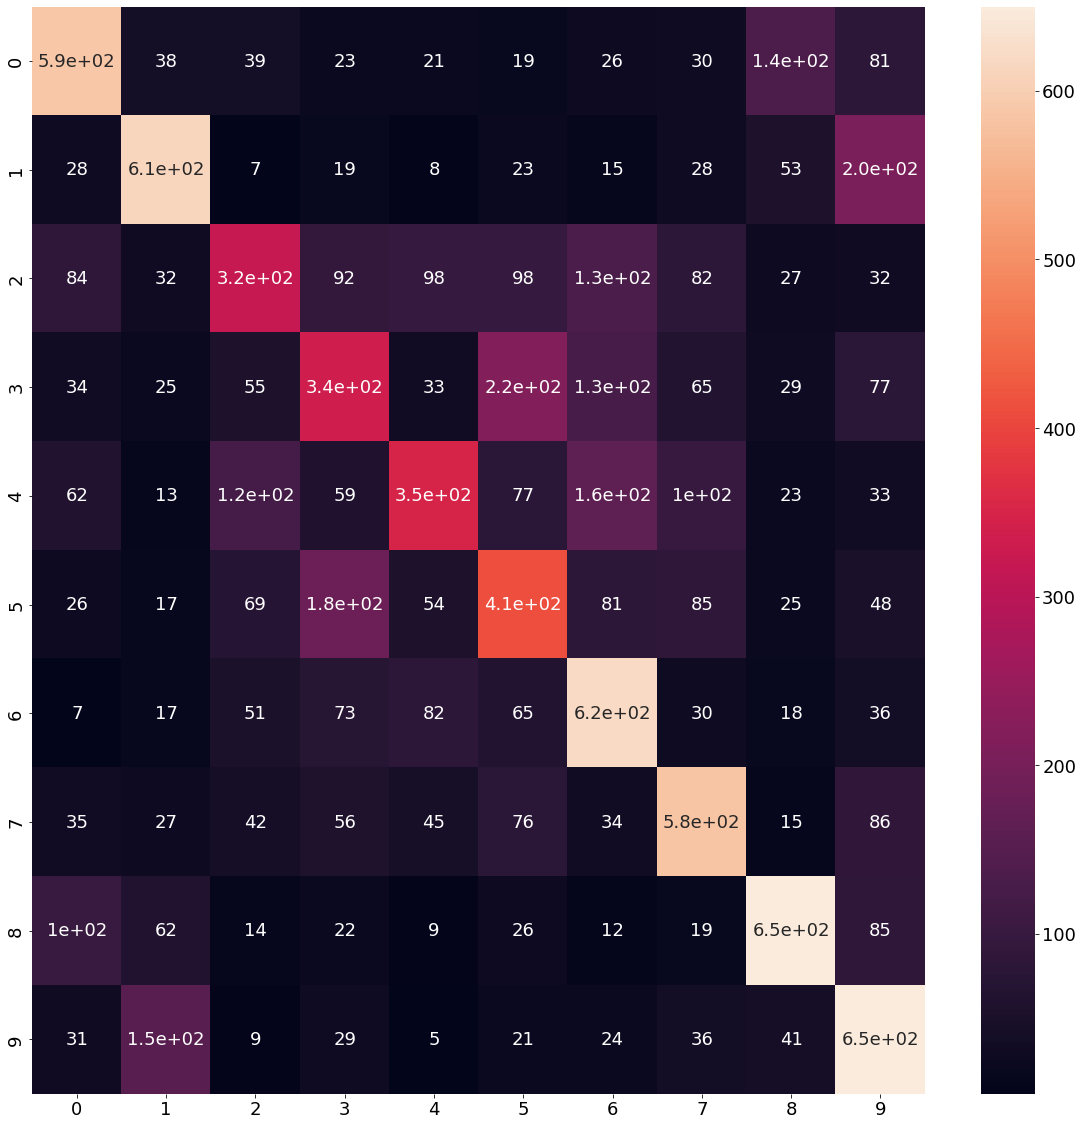

In [ ]:
history_plot(history_1)
Model_Evaluation(model_1,x_test,y_test)

In [ ]:
activation_functions = ['relu','sigmoid','sigmoid']
model_2 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_2 = model_2.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 6s 5ms/step - loss: 2.2318 - accuracy: 0.2079 - val_loss: 2.1751 - val_accuracy: 0.2626
Epoch 2/60
1172/1172 [==============================] - 5s 4ms/step - loss: 2.1301 - accuracy: 0.2689 - val_loss: 2.0997 - val_accuracy: 0.2909
Epoch 3/60
1172/1172 [==============================] - 5s 4ms/step - loss: 2.0639 - accuracy: 0.2935 - val_loss: 2.0444 - val_accuracy: 0.3058
Epoch 4/60
1172/1172 [==============================] - 5s 4ms/step - loss: 2.0144 - accuracy: 0.3110 - val_loss: 2.0030 - val_accuracy: 0.3073
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.9768 - accuracy: 0.3220 - val_loss: 1.9709 - val_accuracy: 0.3167
Epoch 6/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.9468 - accuracy: 0.3293 - val_loss: 1.9440 - val_accuracy: 0.3351
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.9227 - accuracy: 0.3418 - val_loss: 1.9232 - val_accuracy:

313/313 [==============================] - 1s 3ms/step - loss: 1.5891 - accuracy: 0.4457
Model Accuracy=44.6%
Model Loss=1.59


0

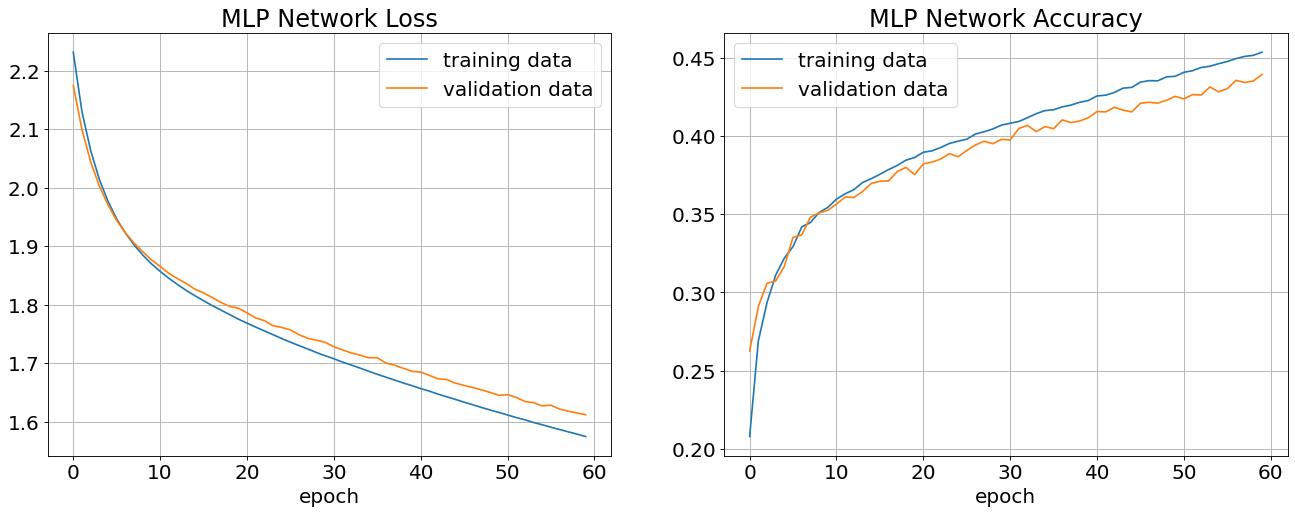

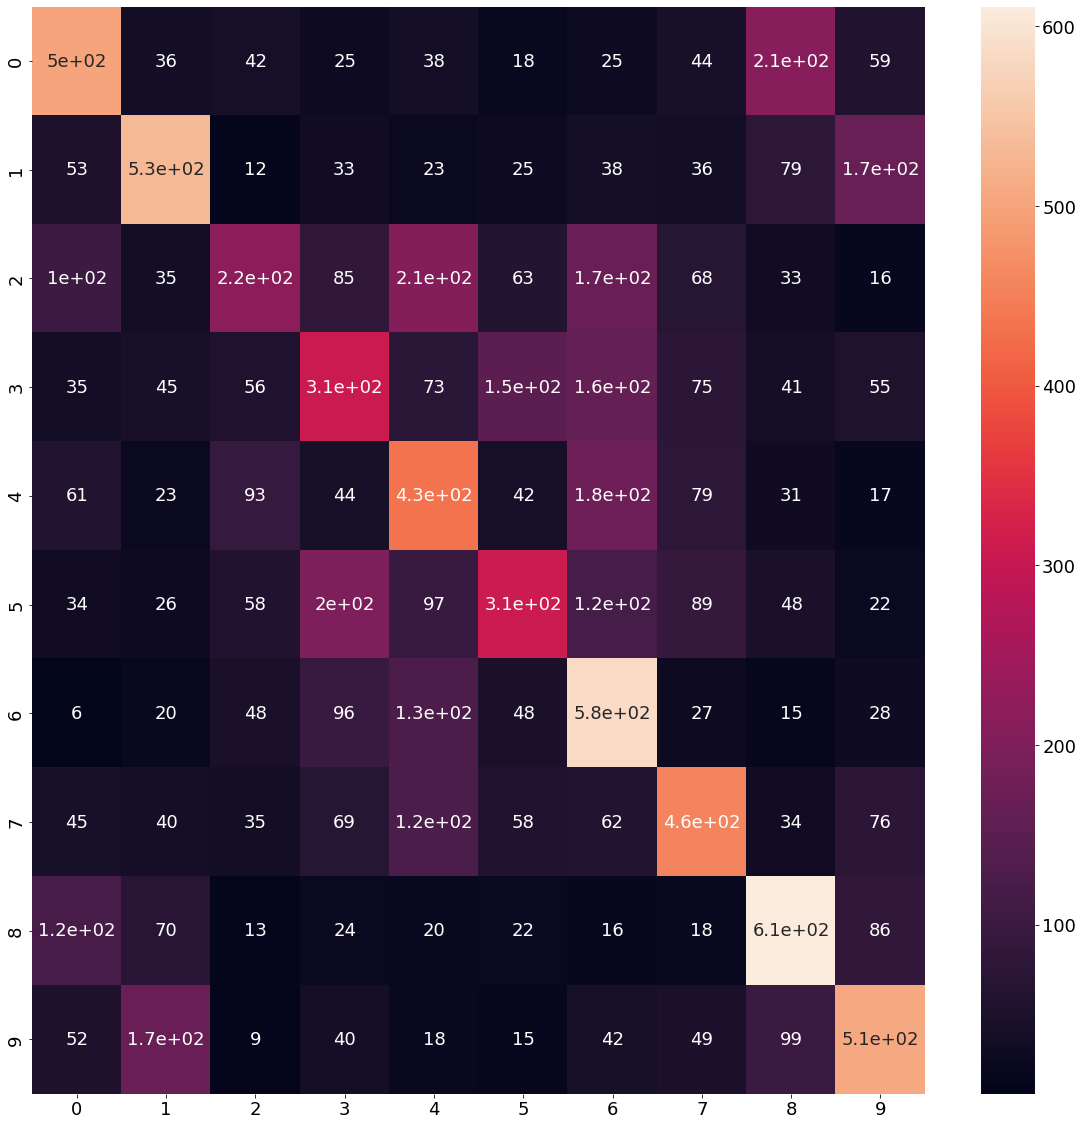

In [ ]:
history_plot(history_2)
Model_Evaluation(model_2,x_test,y_test)

In [ ]:
activation_functions = ['relu','tanh','relu']
model_3 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_3 = model_3.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 6s 5ms/step - loss: 5.0384 - accuracy: 0.1785 - val_loss: 4.8208 - val_accuracy: 0.1159
Epoch 2/60
1172/1172 [==============================] - 5s 4ms/step - loss: 4.1369 - accuracy: 0.1500 - val_loss: 3.6715 - val_accuracy: 0.0993
Epoch 3/60
1172/1172 [==============================] - 5s 4ms/step - loss: 3.6148 - accuracy: 0.1002 - val_loss: 3.6088 - val_accuracy: 0.0993
Epoch 4/60
1172/1172 [==============================] - 5s 4ms/step - loss: 3.5761 - accuracy: 0.1002 - val_loss: 3.5842 - val_accuracy: 0.0993
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 3.5568 - accuracy: 0.1006 - val_loss: 3.5683 - val_accuracy: 0.1009
Epoch 6/60
1172/1172 [==============================] - 5s 4ms/step - loss: 3.5401 - accuracy: 0.1278 - val_loss: 3.5509 - val_accuracy: 0.1602
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 3.5191 - accuracy: 0.1995 - val_loss: 3.5258 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 3.5552 - accuracy: 0.1000
Model Accuracy=10.0%
Model Loss=3.56


0

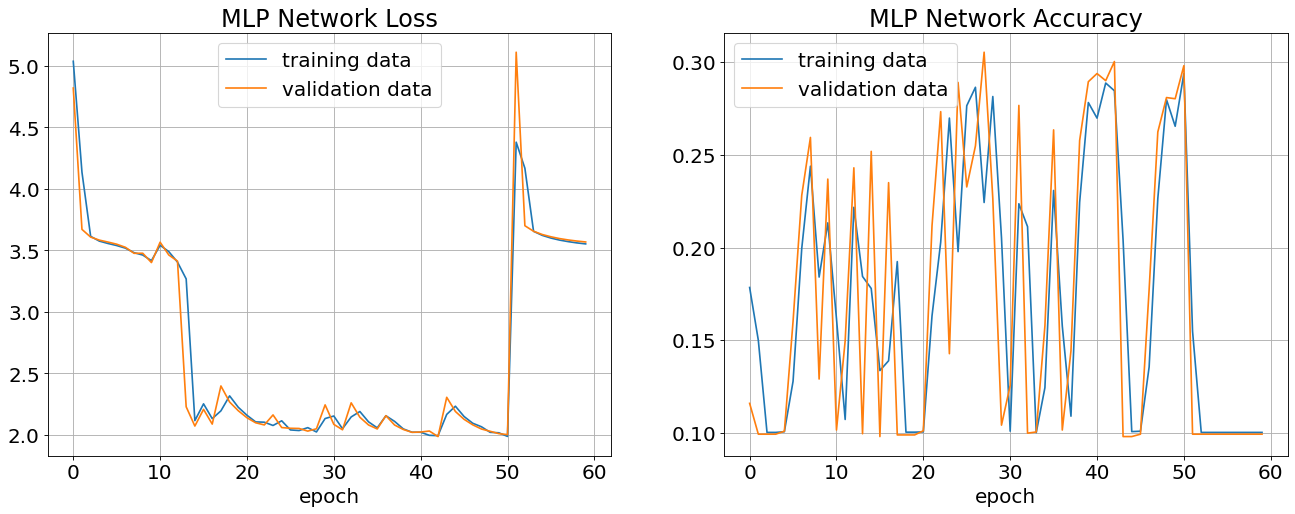

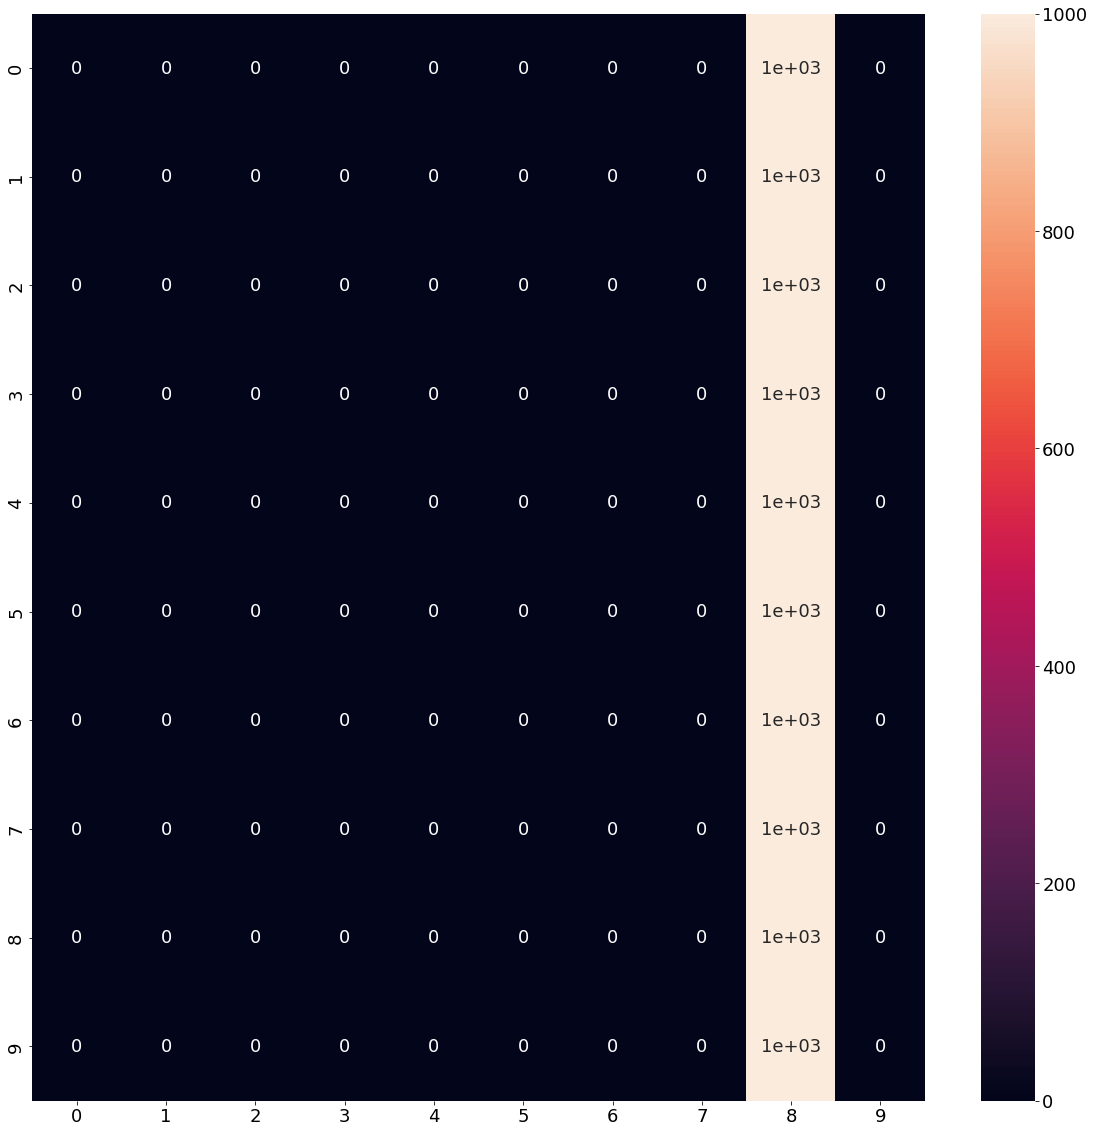

In [ ]:
history_plot(history_3)
Model_Evaluation(model_3,x_test,y_test)

### Part 3 - Loss Function Effect

First loss function = Binary Crossentropy

In [ ]:
activation_functions = ['relu','relu','softmax']
model_optimizer = SGD(learning_rate = alpha)
loss_func = "binary_crossentropy"

model_1 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_1 = model_1.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3480 - accuracy: 0.1609 - val_loss: 0.3298 - val_accuracy: 0.2095
Epoch 2/60
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3246 - accuracy: 0.2333 - val_loss: 0.3209 - val_accuracy: 0.2430
Epoch 3/60
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.2619 - val_loss: 0.3147 - val_accuracy: 0.2694
Epoch 4/60
1172/1172 [==============================] - 5s 5ms/step - loss: 0.3115 - accuracy: 0.2819 - val_loss: 0.3101 - val_accuracy: 0.2838
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3073 - accuracy: 0.2952 - val_loss: 0.3064 - val_accuracy: 0.2962
Epoch 6/60
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3039 - accuracy: 0.3038 - val_loss: 0.3034 - val_accuracy: 0.3047
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3011 - accuracy: 0.3119 - val_loss: 0.3009 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.2651 - accuracy: 0.4022
Model Accuracy=40.2%
Model Loss=0.27


0

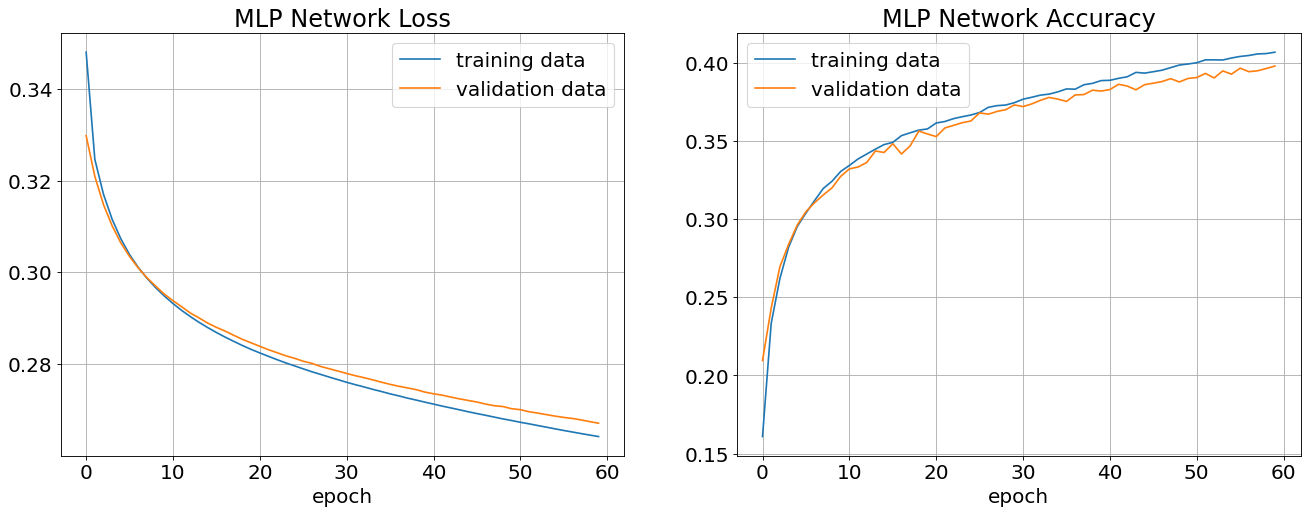

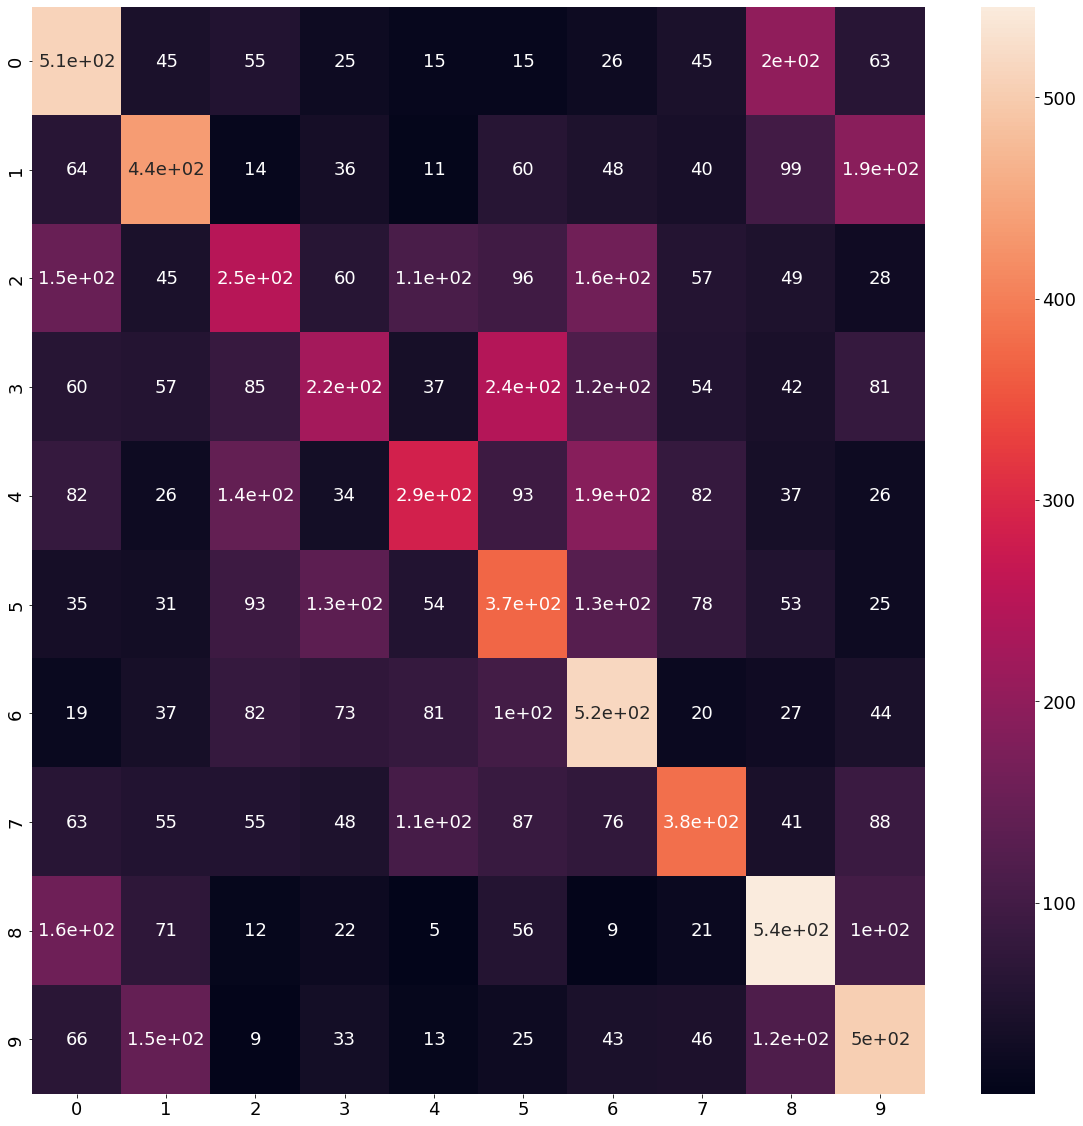

In [ ]:
history_plot(history_1)
Model_Evaluation(model_1,x_test,y_test)

Second Loss Function = Kullback Leibler Divergence

In [ ]:
loss_func = "kullback_leibler_divergence"

model_2 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_2 = model_2.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 6s 5ms/step - loss: 2.0450 - accuracy: 0.2805 - val_loss: 1.9305 - val_accuracy: 0.3386
Epoch 2/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.8769 - accuracy: 0.3490 - val_loss: 1.8534 - val_accuracy: 0.3647
Epoch 3/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.8151 - accuracy: 0.3707 - val_loss: 1.8083 - val_accuracy: 0.3764
Epoch 4/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7756 - accuracy: 0.3858 - val_loss: 1.7748 - val_accuracy: 0.3928
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7448 - accuracy: 0.3985 - val_loss: 1.7567 - val_accuracy: 0.3865
Epoch 6/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7189 - accuracy: 0.4074 - val_loss: 1.7301 - val_accuracy: 0.4017
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.6968 - accuracy: 0.4138 - val_loss: 1.7124 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 1.3912 - accuracy: 0.5059
Model Accuracy=50.6%
Model Loss=1.39


0

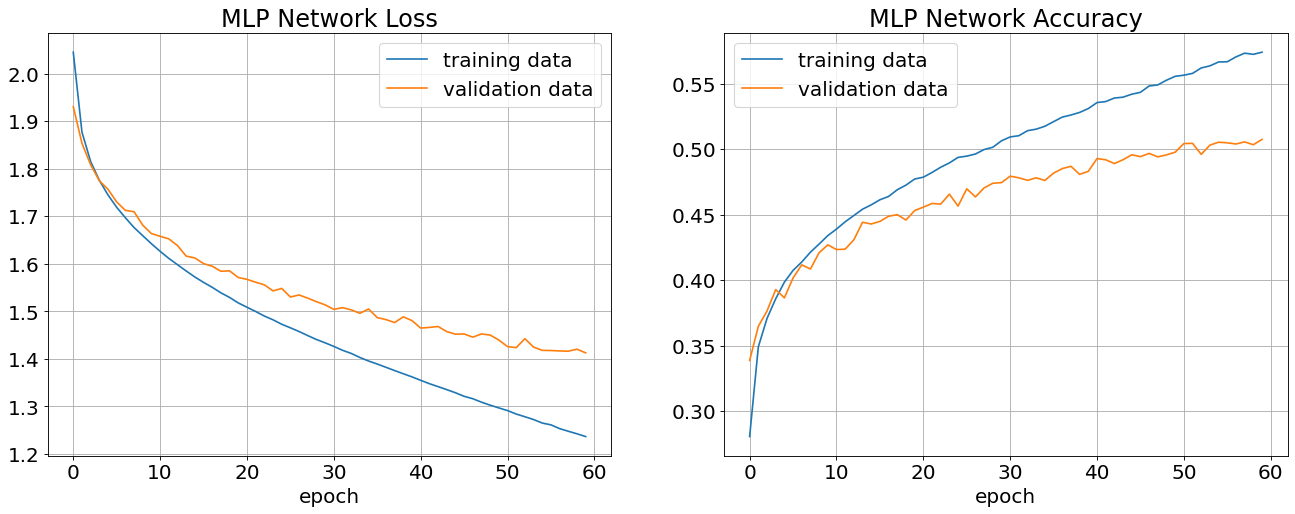

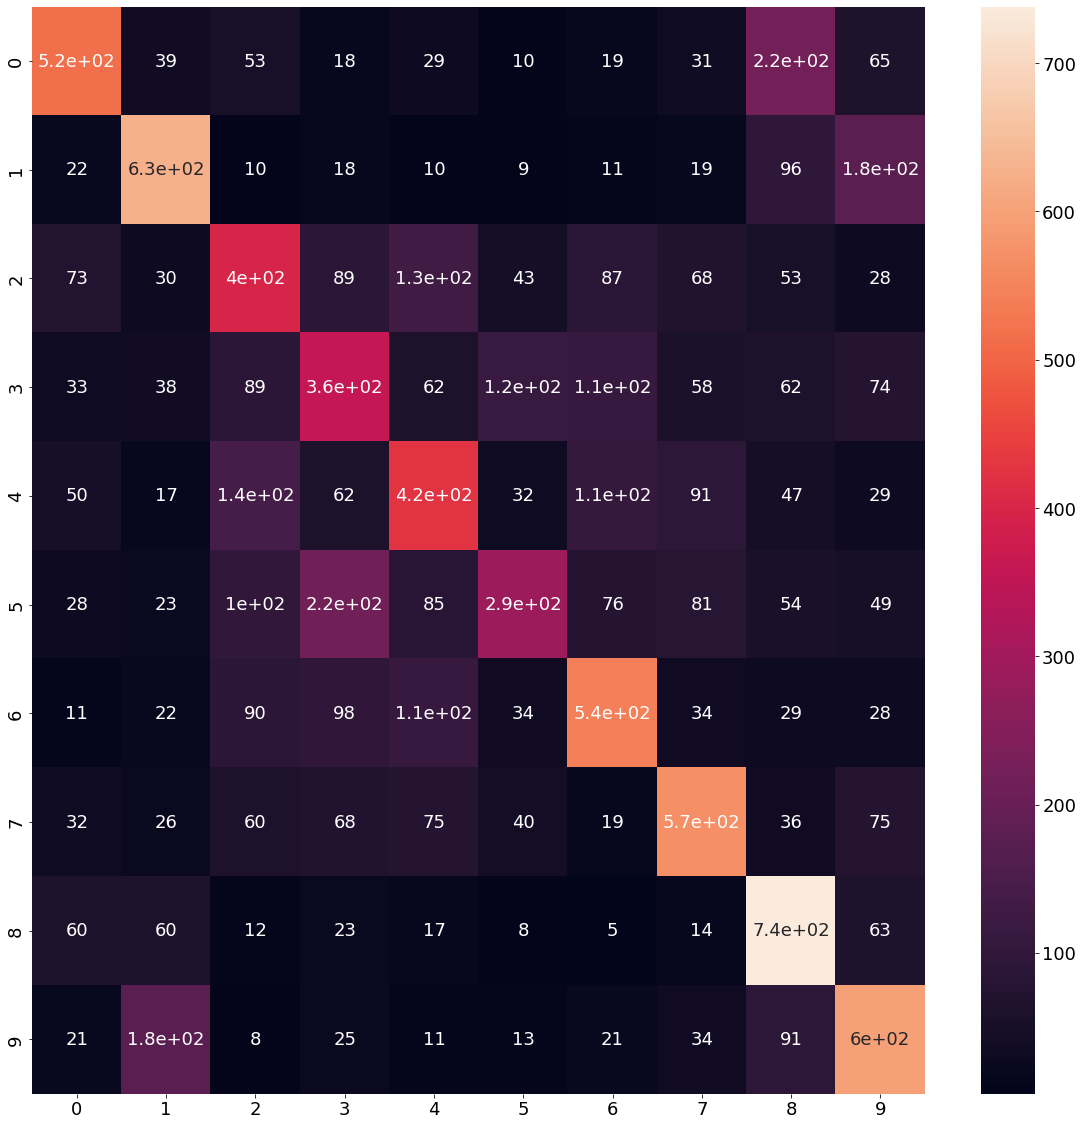

In [ ]:
history_plot(history_2)
Model_Evaluation(model_2,x_test,y_test)

### Part 4 - Optimizer Effect

Adam Optimizer

In [ ]:
activation_functions = ['relu','relu','softmax']
model_optimizer = Adam(learning_rate = alpha)
loss_func = "categorical_crossentropy"

model_1 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_1 = model_1.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.9091 - accuracy: 0.3168 - val_loss: 1.8017 - val_accuracy: 0.3508
Epoch 2/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.6905 - accuracy: 0.3935 - val_loss: 1.7129 - val_accuracy: 0.3922
Epoch 3/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.6093 - accuracy: 0.4214 - val_loss: 1.6193 - val_accuracy: 0.4200
Epoch 4/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.5579 - accuracy: 0.4393 - val_loss: 1.5669 - val_accuracy: 0.4449
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.5197 - accuracy: 0.4572 - val_loss: 1.5214 - val_accuracy: 0.4572
Epoch 6/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.4862 - accuracy: 0.4682 - val_loss: 1.5171 - val_accuracy: 0.4636
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.4618 - accuracy: 0.4756 - val_loss: 1.5102 - val_accuracy:

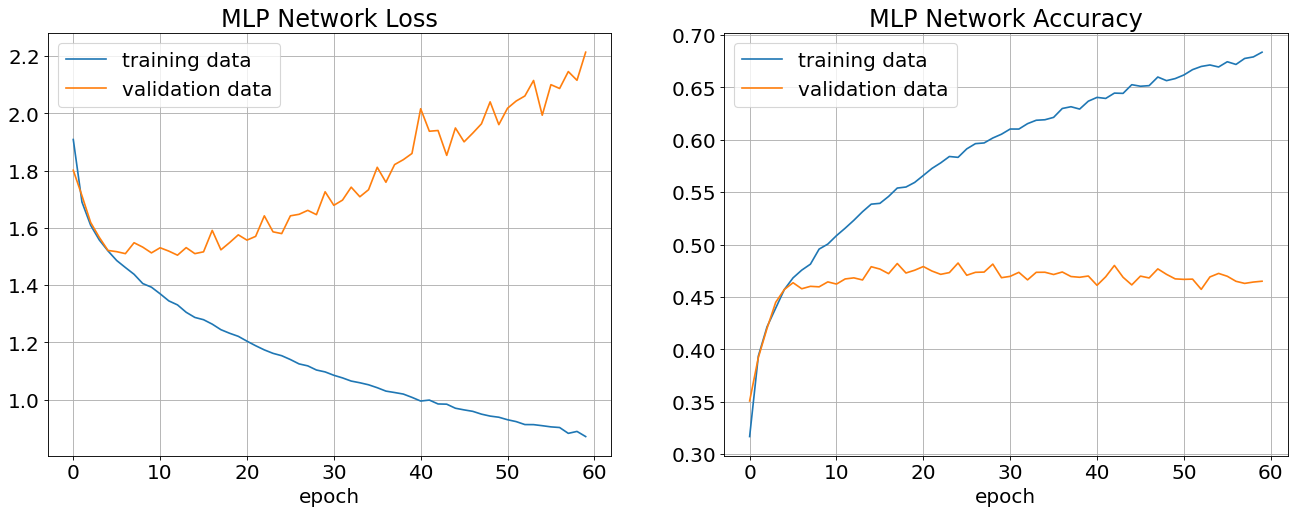

In [ ]:
history_plot(history_1)

Adagrad Optimizer

In [ ]:
activation_functions = ['relu','relu','softmax']
model_optimizer = Adagrad(learning_rate = alpha)
loss_func = "categorical_crossentropy"

model_2 = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
history_2 = model_2.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.9433 - accuracy: 0.3169 - val_loss: 1.8216 - val_accuracy: 0.3587
Epoch 2/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7774 - accuracy: 0.3812 - val_loss: 1.7510 - val_accuracy: 0.3845
Epoch 3/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.7137 - accuracy: 0.4032 - val_loss: 1.7009 - val_accuracy: 0.4122
Epoch 4/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.6710 - accuracy: 0.4181 - val_loss: 1.6733 - val_accuracy: 0.4120
Epoch 5/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.6378 - accuracy: 0.4328 - val_loss: 1.6441 - val_accuracy: 0.4278
Epoch 6/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.6079 - accuracy: 0.4415 - val_loss: 1.6219 - val_accuracy: 0.4368
Epoch 7/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.5842 - accuracy: 0.4504 - val_loss: 1.6251 - val_accuracy:

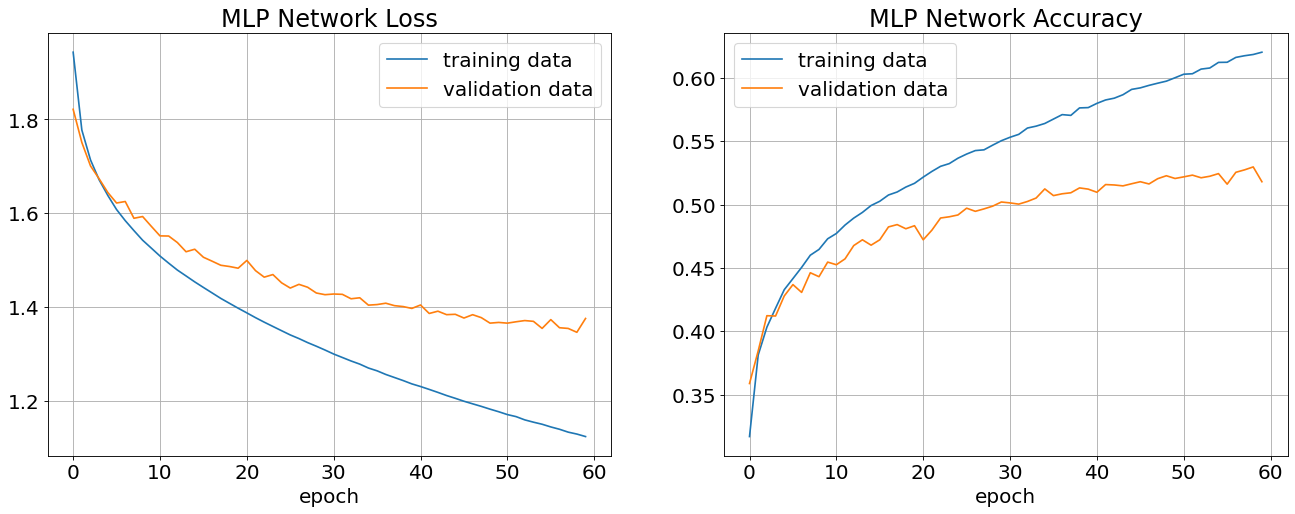

In [ ]:
history_plot(history_2)

### Part 5 - Evaluation of the Optimal Model

In [ ]:
# Optimal Hyper Parameters
activation_functions = ['relu','relu','softmax']
model_optimizer = Adagrad(learning_rate=alpha)
loss_func = 'categorical_crossentropy'
model = MLPNN(num_features,num_neurons,num_out_neuron,activation_functions,model_optimizer,loss_func)
model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 7s 5ms/step - loss: 1.9397 - accuracy: 0.3124 - val_loss: 1.8370 - val_accuracy: 0.3500
Epoch 2/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7789 - accuracy: 0.3776 - val_loss: 1.7687 - val_accuracy: 0.3832
Epoch 3/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.7163 - accuracy: 0.4020 - val_loss: 1.7141 - val_accuracy: 0.4023
Epoch 4/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.6731 - accuracy: 0.4162 - val_loss: 1.6853 - val_accuracy: 0.4086
Epoch 5/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.6373 - accuracy: 0.4316 - val_loss: 1.6546 - val_accuracy: 0.4239
Epoch 6/60
1172/1172 [==============================] - 5s 5ms/step - loss: 1.6083 - accuracy: 0.4428 - val_loss: 1.6429 - val_accuracy: 0.4277
Epoch 7/60
1172/1172 [==============================] - 5s 4ms/step - loss: 1.5836 - accuracy: 0.4501 - val_loss: 1.6246 - val_accuracy:

313/313 [==============================] - 1s 5ms/step - loss: 1.3433 - accuracy: 0.5272
Model Accuracy=52.7%
Model Loss=1.34


0

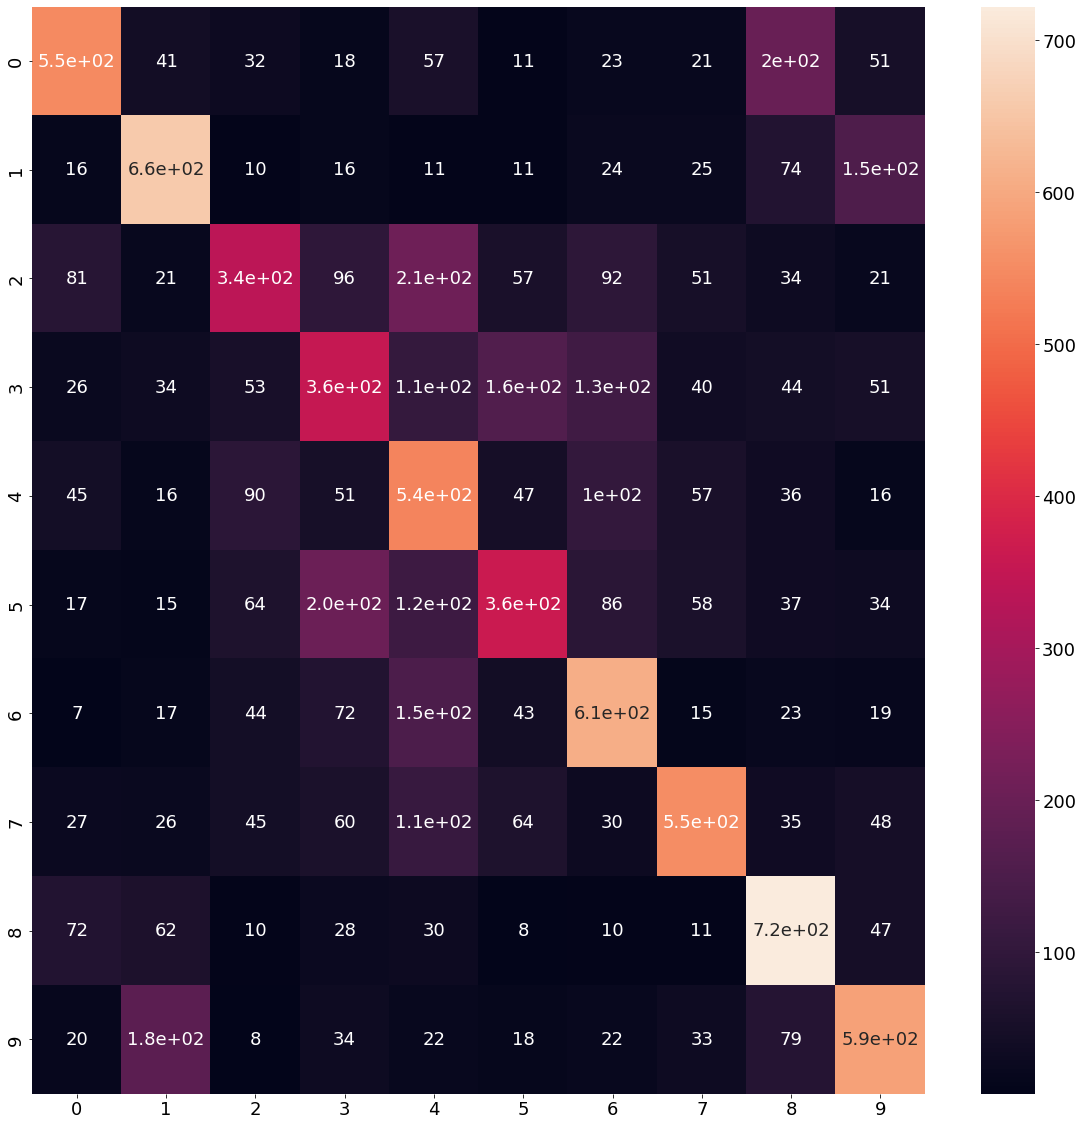

In [ ]:
Model_Evaluation(model,x_test,y_test)

In [ ]:
recall,precision,f1=Evaluation(model,x_test,y_test)
print(f"Recall Score={np.round(recall,2)}")
print(f"Precision Score={np.round(precision,2)}")
print(f"F1-Score={np.round(f1,2)}")

313/313 [==============================] - 1s 2ms/step
Recall Score=0.53
Precision Score=0.53
F1-Score=0.52


## Section 2) CNN+MLP Network

### Convolutional Layers

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
x_train = x_train / 255
x_test = x_test / 255

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.25,train_size =0.75)

In [ ]:
Label_Names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
num_neurons = [1500,750]
num_out_neuron = len(Label_Names)
dense_activations = ['relu','relu','softmax']

alpha = 1e-3
loss_function = 'categorical_crossentropy'
model_optimizer = Adagrad(learning_rate=alpha)

conv_activations = ['relu','relu','relu']
num_filters = [32,32,16]
kernel_sizes = [(5,5),(5,5),(2,2)]
stride_values = [(2,2),(2,2),(1,1)]

In [ ]:
model_conv = Sequential()
model_conv.add(Conv2D(num_filters[0],kernel_sizes[0],strides=stride_values[0],padding='same',input_shape=x_train.shape[1:],activation=conv_activations[0]))
model_conv.add(Conv2D(num_filters[1],kernel_sizes[1],strides=stride_values[1],activation=conv_activations[1]))
model_conv.add(Conv2D(num_filters[2],kernel_sizes[2],strides=stride_values[2],activation=conv_activations[2]))
model_conv.add(Flatten())
model_conv.add(Dense(num_neurons[0],activation=dense_activations[0]))
model_conv.add(Dense(num_neurons[1],activation=dense_activations[1]))
model_conv.add(Dense(num_out_neuron,activation=dense_activations[2]))
model_conv.summary()
model_conv.compile(loss=loss_function,optimizer=model_optimizer,metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 16)          2064      
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1500)              601500    
                                                                 
 dense_1 (Dense)             (None, 750)               1125750   
                                                                 
 dense_2 (Dense)             (None, 10)                7

In [ ]:
history = model_conv.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 16s 6ms/step - loss: 2.2517 - accuracy: 0.1455 - val_loss: 2.1062 - val_accuracy: 0.2380
Epoch 2/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.9849 - accuracy: 0.2841 - val_loss: 1.9096 - val_accuracy: 0.3234
Epoch 3/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8728 - accuracy: 0.3327 - val_loss: 1.8194 - val_accuracy: 0.3614
Epoch 4/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.7871 - accuracy: 0.3670 - val_loss: 1.7385 - val_accuracy: 0.3898
Epoch 5/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.7178 - accuracy: 0.3884 - val_loss: 1.6839 - val_accuracy: 0.4065
Epoch 6/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.6708 - accuracy: 0.4044 - val_loss: 1.6494 - val_accuracy: 0.4135
Epoch 7/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.6343 - accuracy: 0.4175 - val_loss: 1.6303 - val_accuracy

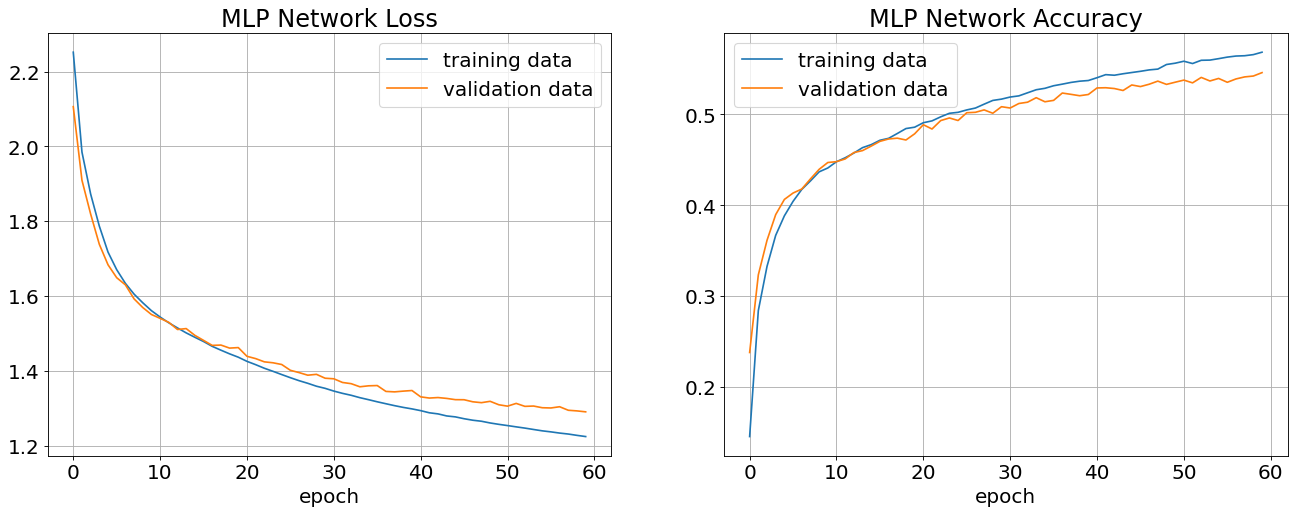

In [ ]:
history_plot(history)

313/313 [==============================] - 1s 3ms/step - loss: 1.2869 - accuracy: 0.5456
Model Accuracy=54.6%
Model Loss=1.29


0

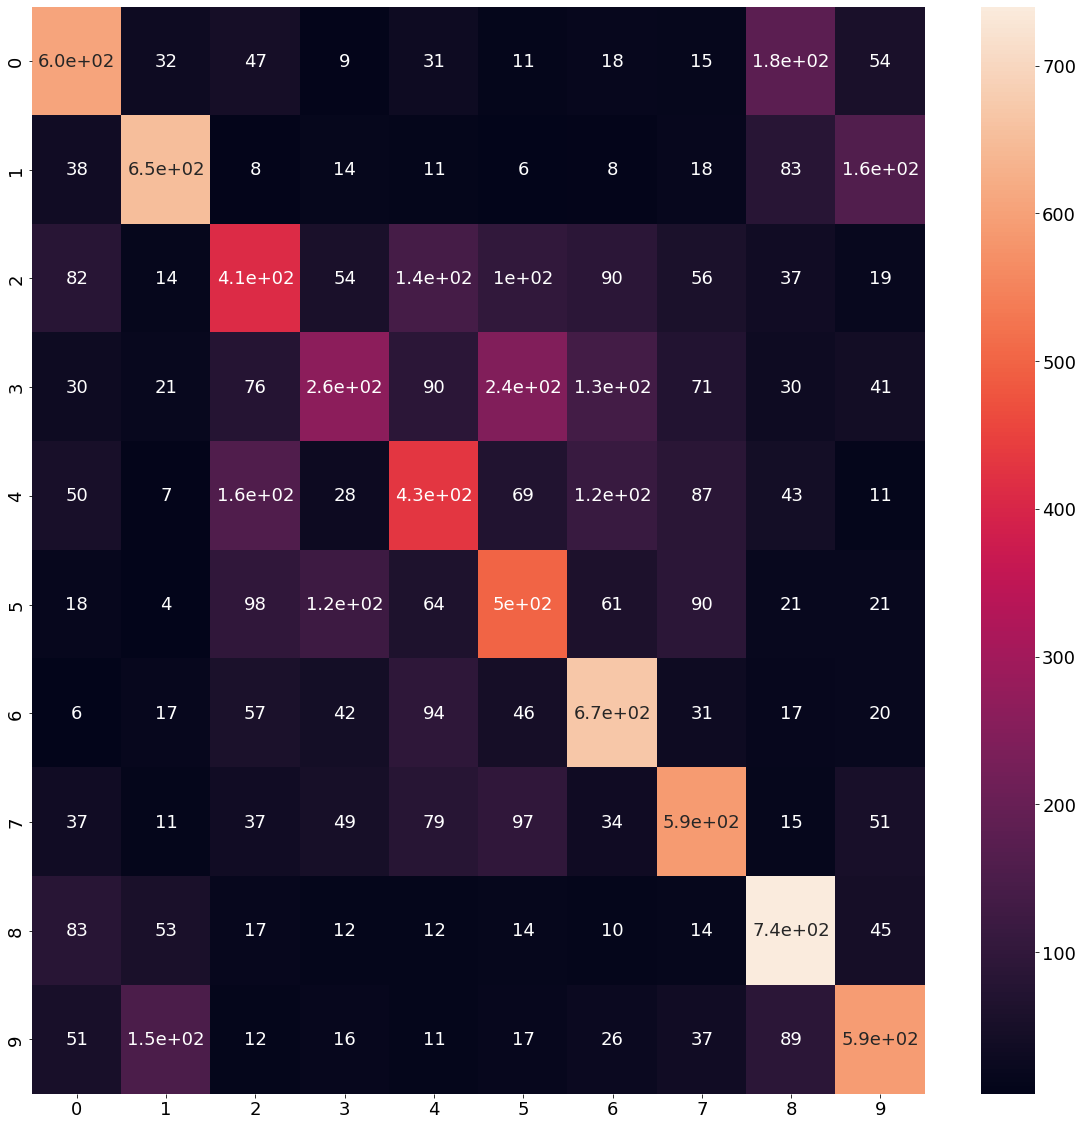

In [ ]:
Model_Evaluation(model_conv,x_test,y_test)

### Pooling & Batch Normalization

In [ ]:
num_neurons = [1500,750]
num_out_neuron = len(Label_Names)
dense_activations = ['relu','relu','softmax']

alpha = 1e-3
loss_function = 'categorical_crossentropy'
model_optimizer = Adagrad(learning_rate=alpha)

conv_activations = ['relu','relu','relu']
num_filters = [32,32,16]
kernel_sizes = [(5,5),(5,5),(2,2)]
stride_values = [(2,2),(2,2),(1,1)]

In [ ]:
model_conv = Sequential()
model_conv.add(Conv2D(num_filters[0],kernel_sizes[0],strides=stride_values[0],padding='same',input_shape=x_train.shape[1:],activation=conv_activations[0]))
model_conv.add(AveragePooling2D(pool_size=2))
model_conv.add(BatchNormalization())
model_conv.add(Conv2D(num_filters[1],kernel_sizes[1],strides=stride_values[1],activation=conv_activations[1]))
model_conv.add(BatchNormalization())
model_conv.add(Conv2D(num_filters[2],kernel_sizes[2],strides=stride_values[2],activation=conv_activations[2]))
model_conv.add(BatchNormalization())
model_conv.add(Flatten())
model_conv.add(Dense(num_neurons[0],activation=dense_activations[0]))
model_conv.add(Dense(num_neurons[1],activation=dense_activations[1]))
model_conv.add(Dense(num_out_neuron,activation=dense_activations[2]))
model_conv.summary()
model_conv.compile(loss=loss_function,optimizer=model_optimizer,metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 average_pooling2d_8 (Averag  (None, 8, 8, 32)         0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_8 (Batc  (None, 8, 8, 32)         128       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 2, 2, 32)          25632     
                                                                 
 batch_normalization_9 (Batc  (None, 2, 2, 32)         128       
 hNormalization)                                                 
                                                      

In [ ]:
history = model_conv.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 8s 6ms/step - loss: 2.1075 - accuracy: 0.2421 - val_loss: 1.9067 - val_accuracy: 0.3118
Epoch 2/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8187 - accuracy: 0.3415 - val_loss: 1.7211 - val_accuracy: 0.3715
Epoch 3/60
1172/1172 [==============================] - 6s 6ms/step - loss: 1.6972 - accuracy: 0.3812 - val_loss: 1.6411 - val_accuracy: 0.4011
Epoch 4/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.6244 - accuracy: 0.4066 - val_loss: 1.5665 - val_accuracy: 0.4282
Epoch 5/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.5746 - accuracy: 0.4227 - val_loss: 1.5308 - val_accuracy: 0.4450
Epoch 6/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.5406 - accuracy: 0.4335 - val_loss: 1.5087 - val_accuracy: 0.4500
Epoch 7/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.5160 - accuracy: 0.4452 - val_loss: 1.4834 - val_accuracy:

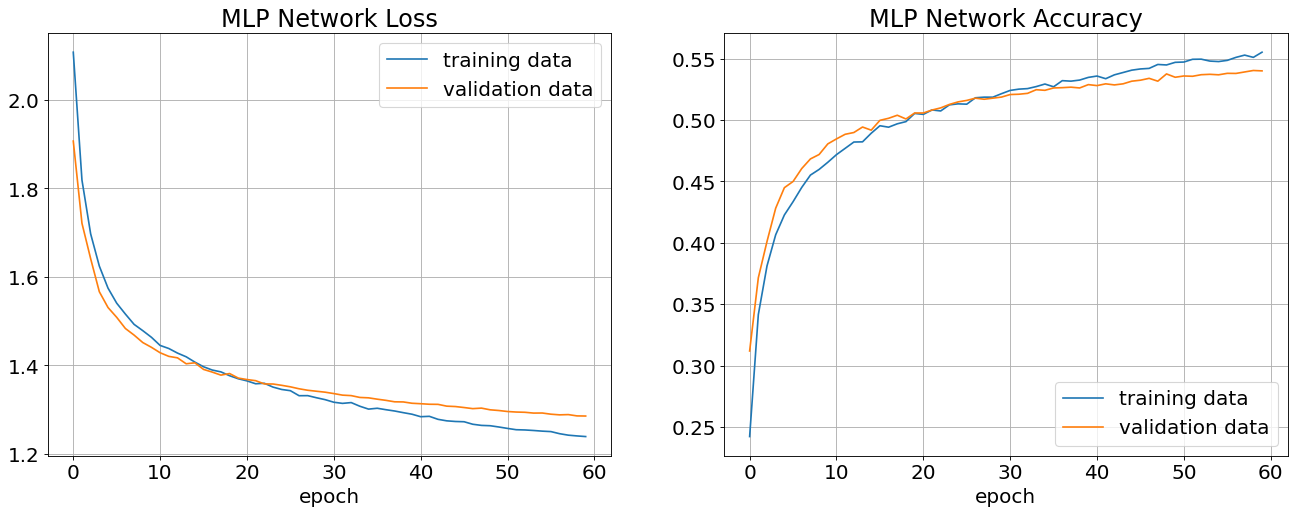

In [ ]:
history_plot(history)

313/313 [==============================] - 1s 4ms/step - loss: 1.2784 - accuracy: 0.5337
Model Accuracy=53.400000000000006%
Model Loss=1.28


0

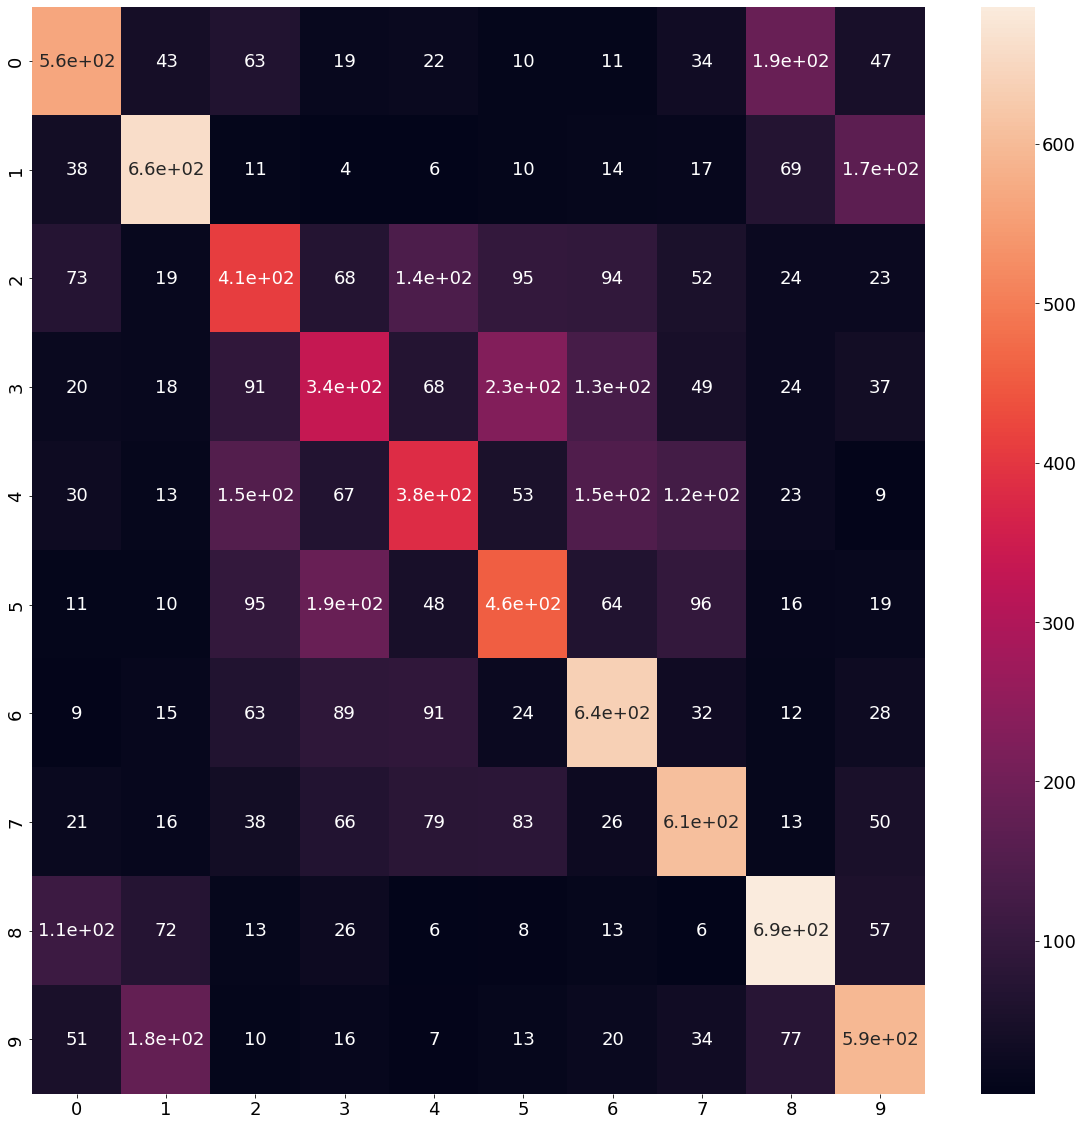

In [ ]:
Model_Evaluation(model_conv,x_test,y_test)

### Drop Out

In [ ]:
num_neurons = [1500,750]
num_out_neuron = len(Label_Names)
dense_activations = ['relu','relu','softmax']

alpha = 1e-3
loss_function = 'categorical_crossentropy'
model_optimizer = Adagrad(learning_rate=alpha)

conv_activations = ['relu','relu','relu']
num_filters = [32,32,16]
kernel_sizes = [(5,5),(5,5),(2,2)]
stride_values = [(2,2),(2,2),(1,1)]

In [ ]:
model_conv = Sequential()
model_conv.add(Conv2D(num_filters[0],kernel_sizes[0],strides=stride_values[0],padding='same',input_shape=x_train.shape[1:],activation=conv_activations[0]))
model_conv.add(AveragePooling2D(pool_size=2))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))
model_conv.add(Conv2D(num_filters[1],kernel_sizes[1],strides=stride_values[1],activation=conv_activations[1]))
model_conv.add(Dropout(0.2))
model_conv.add(BatchNormalization())
model_conv.add(Conv2D(num_filters[2],kernel_sizes[2],strides=stride_values[2],activation=conv_activations[2]))
model_conv.add(Dropout(0.2))
model_conv.add(BatchNormalization())
model_conv.add(Flatten())
model_conv.add(Dense(num_neurons[0],activation=dense_activations[0]))
model_conv.add(Dense(num_neurons[1],activation=dense_activations[1]))
model_conv.add(Dense(num_out_neuron,activation=dense_activations[2]))
model_conv.summary()
model_conv.compile(loss=loss_function,optimizer=model_optimizer,metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 average_pooling2d_9 (Averag  (None, 8, 8, 32)         0         
 ePooling2D)                                                     
                                                                 
 batch_normalization_11 (Bat  (None, 8, 8, 32)         128       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 8, 8, 32)          0         
                                                                 
 conv2d_20 (Conv2D)          (None, 2, 2, 32)          25632     
                                                                 
 dropout_1 (Dropout)         (None, 2, 2, 32)         

In [ ]:
history = model_conv.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60)

Epoch 1/60
1172/1172 [==============================] - 9s 6ms/step - loss: 2.2358 - accuracy: 0.1737 - val_loss: 2.1140 - val_accuracy: 0.2369
Epoch 2/60
1172/1172 [==============================] - 7s 6ms/step - loss: 2.0587 - accuracy: 0.2413 - val_loss: 1.9417 - val_accuracy: 0.3134
Epoch 3/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.9515 - accuracy: 0.2799 - val_loss: 1.8306 - val_accuracy: 0.3527
Epoch 4/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8820 - accuracy: 0.3050 - val_loss: 1.7773 - val_accuracy: 0.3613
Epoch 5/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8391 - accuracy: 0.3182 - val_loss: 1.7131 - val_accuracy: 0.3850
Epoch 6/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8114 - accuracy: 0.3278 - val_loss: 1.6742 - val_accuracy: 0.3926
Epoch 7/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.7915 - accuracy: 0.3324 - val_loss: 1.6620 - val_accuracy:

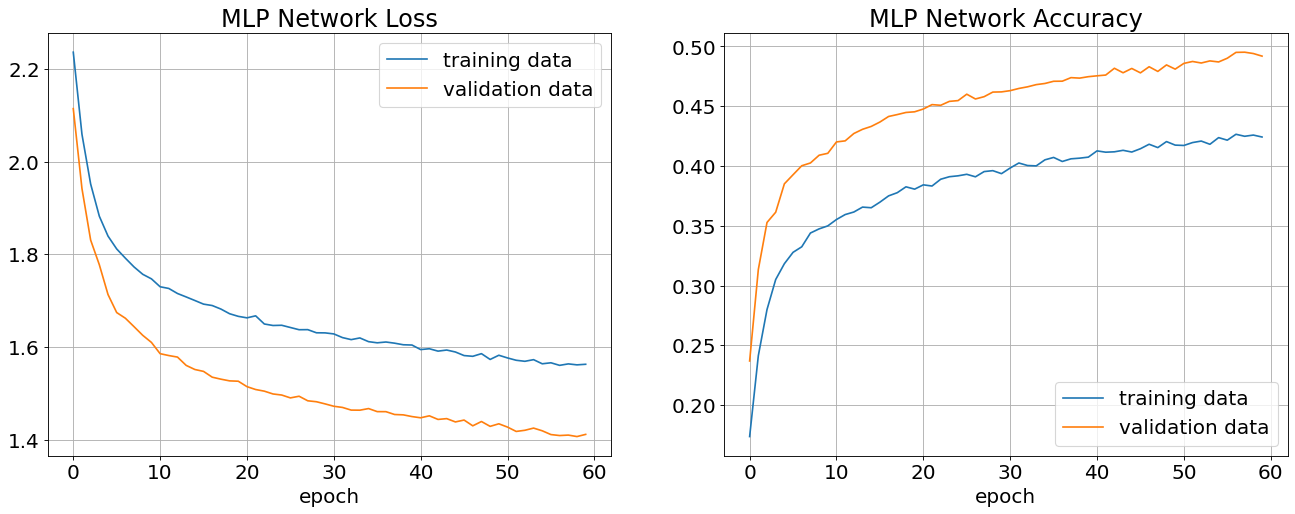

In [ ]:
history_plot(history)

313/313 [==============================] - 1s 3ms/step - loss: 1.4067 - accuracy: 0.4901
Model Accuracy=49.0%
Model Loss=1.41


0

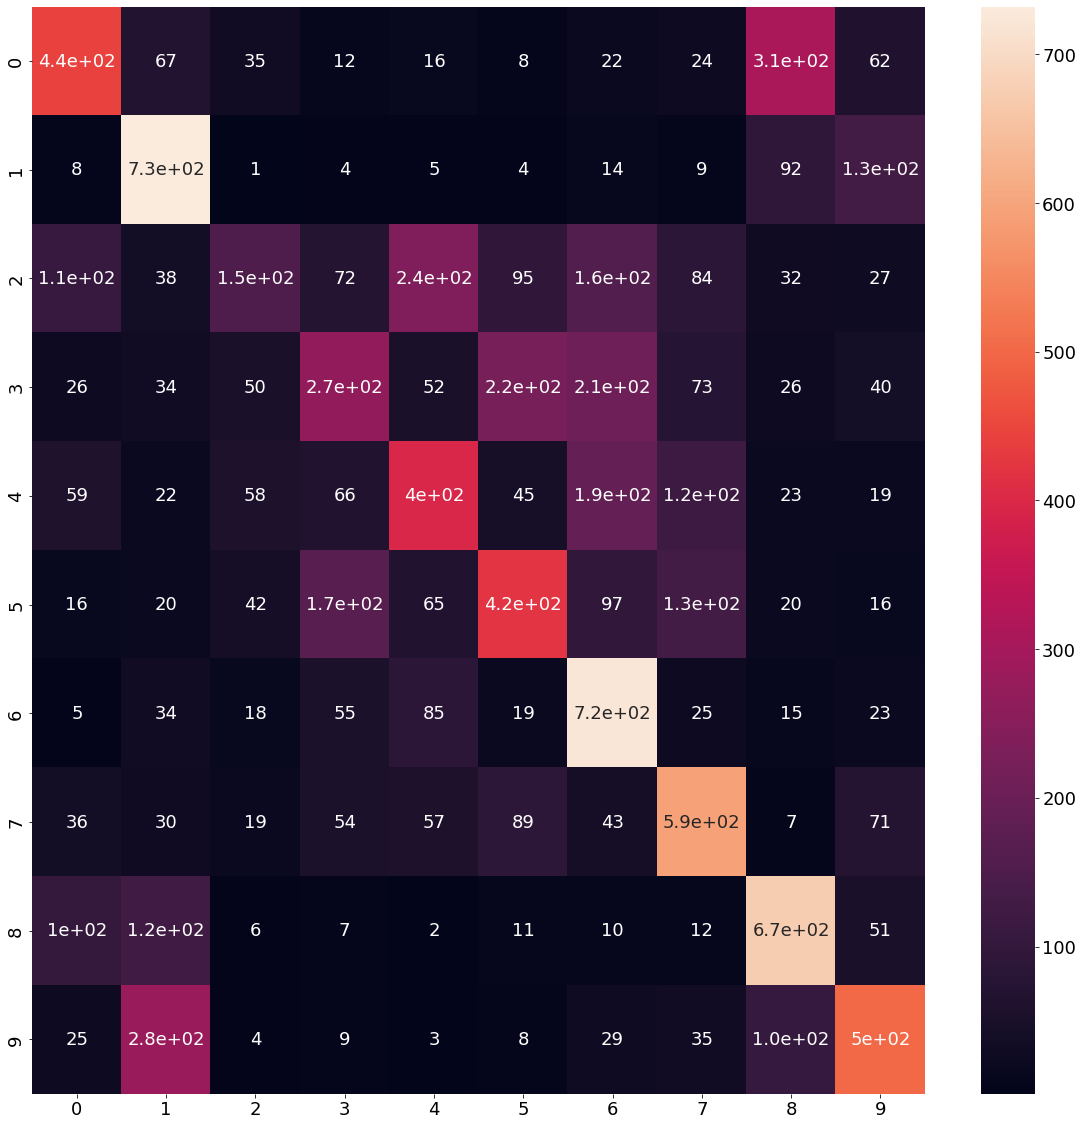

In [ ]:
Model_Evaluation(model_conv,x_test,y_test)

### Ealy Stopping

In [ ]:
num_neurons = [1500,750]
num_out_neuron = len(Label_Names)
dense_activations = ['relu','relu','softmax']

alpha = 1e-3
loss_function = 'categorical_crossentropy'
model_optimizer = Adagrad(learning_rate=alpha)

conv_activations = ['relu','relu','relu']
num_filters = [32,32,16]
kernel_sizes = [(5,5),(5,5),(2,2)]
stride_values = [(2,2),(2,2),(1,1)]

early_stopping = EarlyStopping(patience=10)

In [ ]:
model_conv = Sequential()
model_conv.add(Conv2D(num_filters[0],kernel_sizes[0],strides=stride_values[0],padding='same',input_shape=x_train.shape[1:],activation=conv_activations[0]))
model_conv.add(AveragePooling2D(pool_size=2))
model_conv.add(BatchNormalization())
model_conv.add(Dropout(0.2))
model_conv.add(Conv2D(num_filters[1],kernel_sizes[1],strides=stride_values[1],activation=conv_activations[1]))
model_conv.add(Dropout(0.2))
model_conv.add(BatchNormalization())
model_conv.add(Conv2D(num_filters[2],kernel_sizes[2],strides=stride_values[2],activation=conv_activations[2]))
model_conv.add(Dropout(0.2))
model_conv.add(BatchNormalization())
model_conv.add(Flatten())
model_conv.add(Dense(num_neurons[0],activation=dense_activations[0]))
model_conv.add(Dense(num_neurons[1],activation=dense_activations[1]))
model_conv.add(Dense(num_out_neuron,activation=dense_activations[2]))
model_conv.summary()
model_conv.compile(loss=loss_function,optimizer=model_optimizer,metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 average_pooling2d_11 (Avera  (None, 8, 8, 32)         0         
 gePooling2D)                                                    
                                                                 
 batch_normalization_17 (Bat  (None, 8, 8, 32)         128       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2, 32)          25632     
                                                                 
 dropout_7 (Dropout)         (None, 2, 2, 32)         

In [ ]:
history = model_conv.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=32,epochs=60,callbacks=[early_stopping])

Epoch 1/60
1172/1172 [==============================] - 10s 7ms/step - loss: 2.1928 - accuracy: 0.1817 - val_loss: 2.0737 - val_accuracy: 0.2230
Epoch 2/60
1172/1172 [==============================] - 11s 9ms/step - loss: 2.0436 - accuracy: 0.2346 - val_loss: 1.9432 - val_accuracy: 0.2818
Epoch 3/60
1172/1172 [==============================] - 12s 10ms/step - loss: 1.9548 - accuracy: 0.2659 - val_loss: 1.8463 - val_accuracy: 0.3142
Epoch 4/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8948 - accuracy: 0.2832 - val_loss: 1.7895 - val_accuracy: 0.3307
Epoch 5/60
1172/1172 [==============================] - 7s 6ms/step - loss: 1.8575 - accuracy: 0.2995 - val_loss: 1.7453 - val_accuracy: 0.3636
Epoch 6/60
1172/1172 [==============================] - 6s 5ms/step - loss: 1.8347 - accuracy: 0.3061 - val_loss: 1.7198 - val_accuracy: 0.3681
Epoch 7/60
1172/1172 [==============================] - 9s 8ms/step - loss: 1.8081 - accuracy: 0.3178 - val_loss: 1.6953 - val_accur

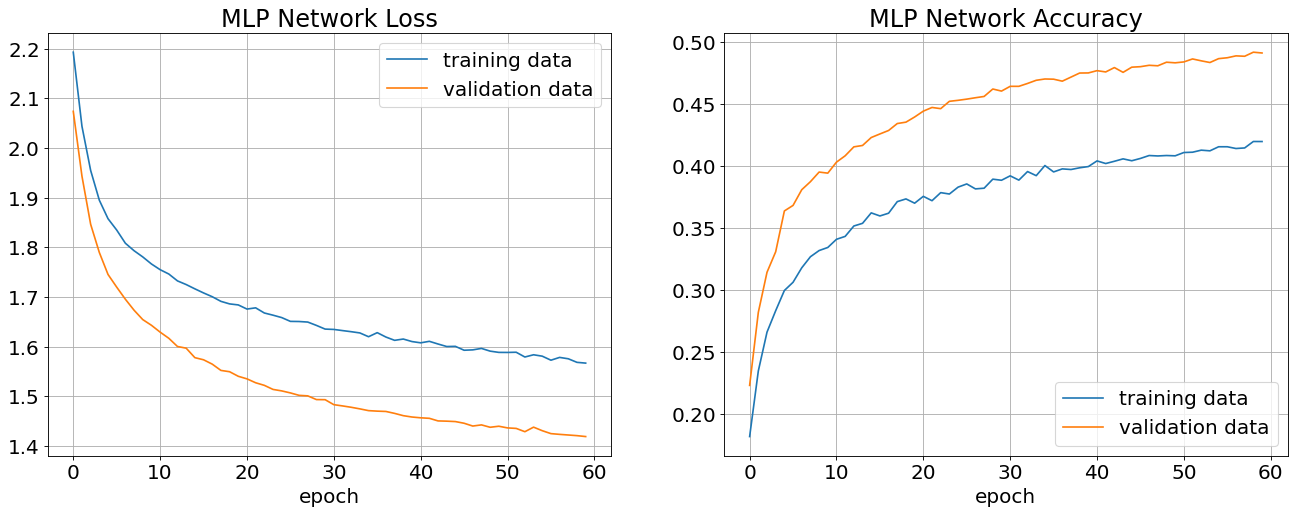

In [ ]:
history_plot(history)

313/313 [==============================] - 1s 3ms/step - loss: 1.4127 - accuracy: 0.4849
Model Accuracy=48.5%
Model Loss=1.41


0

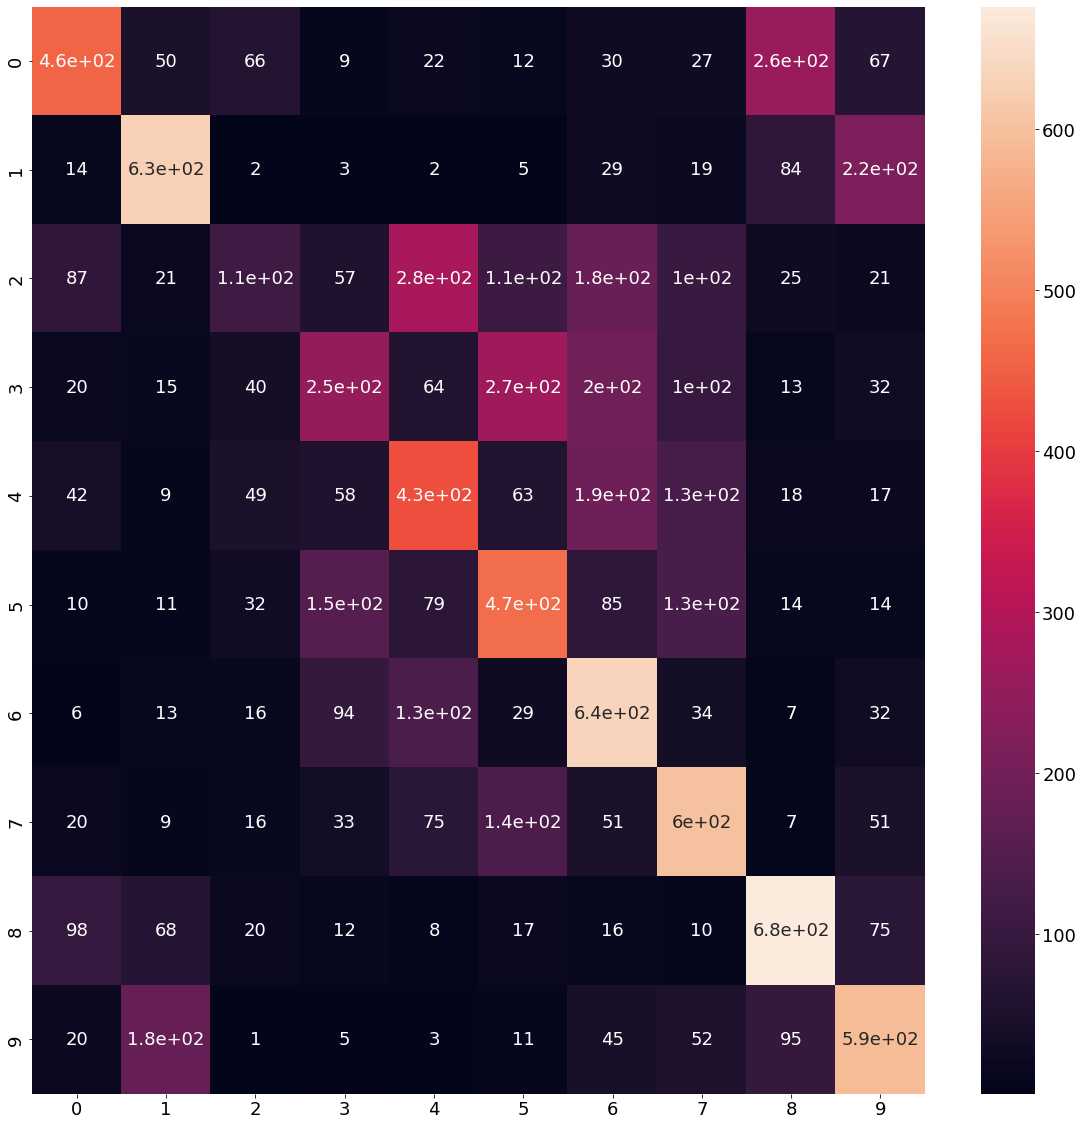

In [ ]:
Model_Evaluation(model_conv,x_test,y_test)

# Question 3) Transfer Learning for Efficient Net

### Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, Adagrad
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import  decode_predictions, preprocess_input
import cv2
from skimage.transform import resize
from tensorflow.keras.utils import load_img
from keras.datasets import cifar10

## Part 2) Transfer Learning Implementation

In this section we aim to implement the pre-trained model and test it with one picture which has been taken by myself. Below the picture can be observed.

In [ ]:
file_name = 'Test_Pic_Perfume.jpg'

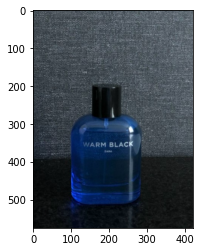

In [ ]:
test_pic = cv2.imread(file_name)
plt.imshow(test_pic)

Preprocessing the image:

In [ ]:
def Preprocessor(image):
    IMG_SIZE = 224
    test_pic = resize(image,(IMG_SIZE,IMG_SIZE,3),preserve_range=True)
    test_pic = preprocess_input(test_pic)
    test_data = np.reshape(test_pic,(1,IMG_SIZE,IMG_SIZE,3))
    return test_data

In [ ]:
# Input should be 224 x 224 x 224 
# Scaling the values of the pixels is so vital
test_data = Preprocessor(test_pic)

Loading the Model

In [ ]:
model = EfficientNetB0(include_top=True,weights='imagenet')

Predicting the label

In [ ]:
def Model_Prediction(model,test_data,N):
    test_pred = model.predict(test_data)
    pred_labels = decode_predictions(test_pred)
    Labels = []
    Probs = []
    for i in range(N):
        Labels.append(pred_labels[0][i][1])
        Probs.append(pred_labels[0][i][2])
    Prediction = {'Label':Labels,'Probability':Probs}
    df = pd.DataFrame(Prediction)
    return df

In [ ]:
Model_Prediction(model,test_data,3)

1/1 [==============================] - 1s 1s/step


,Label,Probability
0,perfume,0.609569
1,lotion,0.168529
2,soap_dispenser,0.024027


## Part 3) Solving an Error

In [ ]:
def Model_Prediction_V2(model,test_data,N,prob_threshold):
    test_pred = model.predict(test_data)
    pred_labels = decode_predictions(test_pred)
    Labels = []
    Probs = []
    for i in range(N):
        Labels.append(pred_labels[0][i][1])
        Probs.append(pred_labels[0][i][2])
    Prediction = {'Label':Labels,'Probability':Probs}
    df = pd.DataFrame(Prediction)
    if max(Probs) < prob_threshold:
        print("Model is not able to classify this image.")
        return
    else:
        print(Labels[np.argmax(Probs)])
        return

In this section we aim to state a solution for cases that model is not trained for and states predictions which are not trustable.

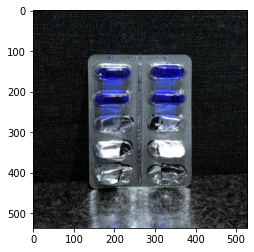

In [ ]:
test_pic_1 = cv2.imread('Pills.jpg')
plt.imshow(test_pic_1)

In [ ]:
Model_Prediction(model,Preprocessor(test_pic_1),3)

1/1 [==============================] - 0s 35ms/step


,Label,Probability
0,beaker,0.111231
1,vending_machine,0.060862
2,saltshaker,0.059228


Using the corrected function for classification

1/1 [==============================] - 0s 34ms/step
mouse


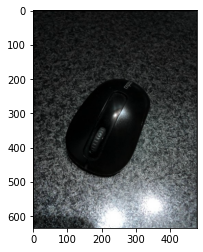

In [ ]:
test_pic_2 = cv2.imread('Test_Pic_Mouse.jpg')
plt.imshow(test_pic_2)
Model_Prediction_V2(model,Preprocessor(test_pic_2),3,0.6)

1/1 [==============================] - 0s 31ms/step
Model is not able to classify this image.


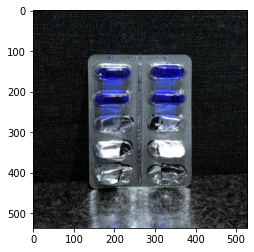

In [ ]:
test_pic_1 = cv2.imread('Pills.jpg')
plt.imshow(test_pic_1)
Model_Prediction_V2(model,Preprocessor(test_pic_1),3,0.6)

## Part 4) Training the Network with New Dataset

In [3]:
def history_plot_2(history):
    plt.figure(figsize=(20, 7), dpi=80, facecolor='w', edgecolor='w')
    font = {'weight' : 'normal',
            'size'   : 18}
    plt.rc('font', **font)

    plt.subplot(121)
    plt.plot(history.history['loss'],label="training data")
    plt.plot(history.history['val_loss'],label="validation data")
    plt.grid('on')
    plt.xlabel("epoch")
    plt.legend()
    plt.title("Network Loss")

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label="training data")
    plt.plot(history.history['val_accuracy'], label="validation data")
    plt.grid('on')
    plt.xlabel("epoch")
    plt.legend()
    plt.title('Network Accuracy')

In [11]:
(X,Y),(_,_) = cifar10.load_data()

In [12]:
# Label 0: Airplane / Label 1: Automobile
indexes = np.where(((Y==0) | (Y==1))==1)[0]
X = X[indexes]
Y = Y[indexes]
Y = np_utils.to_categorical(Y)
X = X[:600]
Y = Y[:600]
X_ = []

In [13]:
for i in range(len(X)):
    temp_1 = X[i]
    temp_2 = np.zeros((224,224,3))
    for k in range(32):
        for m in range(32):
            for l in range(3):
                temp_2[k+112-16][m+112-16][l] = temp_1[k][m][l]
    X_.append(temp_2)

In [14]:
X__ = np.array(X_)

In [19]:
Model_New = EfficientNetB0(weights='imagenet')
TL_Model = Sequential()
TL_Model.add(Model_New)
TL_Model.add(Dense(500,activation='relu'))
TL_Model.add(Dropout(0.2))
TL_Model.add(BatchNormalization())
TL_Model.add(Dense(100,activation='relu'))
TL_Model.add(Dropout(0.4))
TL_Model.add(Dense(20,activation='relu'))
TL_Model.add(Dense(2,activation='softmax'))
TL_Model.compile(optimizer=Adam(learning_rate=0.1),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
history = TL_Model.fit(X__,Y,validation_split=0.3,epochs=10)

Epoch 1/10
14/14 [==============================] - 15s 444ms/step - loss: 1.8171 - accuracy: 0.4881 - val_loss: 0.6931 - val_accuracy: 0.5111
Epoch 2/10
14/14 [==============================] - 4s 309ms/step - loss: 0.7099 - accuracy: 0.4857 - val_loss: 0.6939 - val_accuracy: 0.4889
Epoch 3/10
14/14 [==============================] - 4s 310ms/step - loss: 0.6999 - accuracy: 0.4667 - val_loss: 0.6929 - val_accuracy: 0.5111
Epoch 4/10
14/14 [==============================] - 4s 309ms/step - loss: 0.6963 - accuracy: 0.5095 - val_loss: 0.6934 - val_accuracy: 0.5111
Epoch 5/10
14/14 [==============================] - 5s 330ms/step - loss: 0.6940 - accuracy: 0.4905 - val_loss: 0.6938 - val_accuracy: 0.4889
Epoch 6/10
14/14 [==============================] - 4s 317ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5111
Epoch 7/10
14/14 [==============================] - 4s 316ms/step - loss: 0.6954 - accuracy: 0.5095 - val_loss: 0.6930 - val_accuracy: 0.5111
Epoch